# Data loading

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Load the CSV file
file_path= '/content/drive/My Drive/shap_experiment/data'
df_processed_combined_data_daily = pd.read_csv(file_path+"/processed_combined_imputed_with_neighbors_df_processed_combined_data_daily.csv")
df_aqi_daily = pd.read_csv(file_path+"/dataset_aqi_daily.csv")

df_aqi_daily.DateTime = pd.to_datetime(df_aqi_daily.DateTime)
df_processed_combined_data_daily.DateTime = pd.to_datetime(df_processed_combined_data_daily.DateTime)
df_PM10_daily = df_processed_combined_data_daily[['DateTime','Bjelave_PM10']]

Mounted at /content/drive


In [ ]:
#from google.colab import drive
#import pandas as pd

#drive.mount('/content/drive')

# Load the CSV file
#df_aqi_daily = pd.read_csv(os.path.join(input_dir,'BRITS_imputed_preprocessed_combined_data.csv'))
#file_path= '/content/drive/My Drive/shap_experiment'
#df_processed_combined_data_daily = pd.read_csv(file_path+"/processed_combined_data_daily.csv")
#df_aqi_daily = pd.read_csv(file_path+"/dataset_aqi_daily.csv")

#df_aqi_daily.DateTime = pd.to_datetime(df_aqi_daily.DateTime)
#df_processed_combined_data_daily.DateTime = pd.to_datetime(df_processed_combined_data_daily.DateTime)


In [ ]:
df_processed_combined_data_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateTime        1826 non-null   datetime64[ns]
 1   wind_speed      1826 non-null   float64       
 2   wind_direction  1826 non-null   float64       
 3   precipitation   1826 non-null   float64       
 4   pressure        1826 non-null   float64       
 5   temperature     1826 non-null   float64       
 6   humidity        1826 non-null   float64       
 7   visibility      1826 non-null   float64       
 8   cloudiness      1826 non-null   float64       
 9   Bjelave_PM10    1826 non-null   float64       
 10  Bjelave_SO2     1826 non-null   float64       
 11  Bjelave_NO2     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 171.3 KB


In [ ]:
# Ensure DateTime column is in datetime format
df_aqi_daily['DateTime'] = pd.to_datetime(df_aqi_daily['DateTime'], dayfirst=True)  # dayfirst=True if your dates are in DD.MM.YYYY format
df_processed_combined_data_daily['DateTime'] = pd.to_datetime(df_processed_combined_data_daily['DateTime'], dayfirst=True)
# Filter to keep only rows before 1.1.2024
df_aqi_daily = df_aqi_daily[df_aqi_daily['DateTime'] < '2023-01-01']
df_processed_combined_data_daily = df_processed_combined_data_daily[df_processed_combined_data_daily['DateTime'] < '2023-01-01']



In [280]:
!du -sh /usr/local/lib/python3.11/dist-packages/

19G	/usr/local/lib/python3.11/dist-packages/


#  Data imputation with neighbors processed_combined_imputed_with_neighbors_daily.csv

In [ ]:
#columns = ['DateTime', 'Ambasada_PM2.5','wind_speed', 'wind_direction', 'precipitation', 'pressure', 'temperature', 'humidity', 'visibility', 'cloudiness', 'Bjelave_PM10', 'Bjelave_SO2', 'Bjelave_NO2']
columns = ['DateTime', 'wind_speed', 'wind_direction', 'precipitation', 'pressure', 'temperature', 'humidity', 'visibility', 'cloudiness', 'Bjelave_PM10', 'Bjelave_SO2', 'Bjelave_NO2']

df_processed_combined_data_daily = df_processed_combined_data_daily[columns]

In [ ]:
def fill_missing_days_with_neighbors(df, label):
    df.set_index('DateTime', inplace=True)
    # counts number of consecutive missing values and stores start and end date of each sequence in a list
    nan_start_end_dates = df[df[label].isnull()].groupby(df[label].notnull().cumsum()).apply(lambda x: (x.index[0], x.index[-1])).tolist()
    for start_date, end_date in nan_start_end_dates:
        # Calculate the number of missing days between the start and end date +1 because we want to include the end date
        missing_days_number = (end_date - start_date).days + 1
        print(f"Filling missing values between {start_date} and {end_date} = number of missing days: {missing_days_number}")
        # take previous and next missing_days_number days grouped by day and calculate mean for each hour
        prev_days = df.loc[start_date - pd.DateOffset(days=missing_days_number) : start_date]
        next_days = df.loc[end_date : end_date + pd.DateOffset(days=missing_days_number)]
        neighbor_days = pd.concat([prev_days, next_days])
        mean_val = neighbor_days[label].mean()
        # fill missing days with mean values
        df.loc[start_date:end_date, label] = mean_val
    df.reset_index(inplace=True)
    return df

In [ ]:
total_nulls = df_aqi_daily.isnull().sum().sum()
print(f"Ukupno null vrijednosti: {total_nulls}")
#fill_missing_days_with_neighbors(df_aqi_daily,label= 'AQI')

Ukupno null vrijednosti: 0


In [ ]:
for column in df_processed_combined_data_daily.columns[1:]:  # Columns from index 1 to 14
    if df_processed_combined_data_daily[column].isnull().any():  # Check if there are missing values
        print(f"Processing column: {column}")
        df_processed_combined_data_daily = fill_missing_days_with_neighbors(df_processed_combined_data_daily, column)
    else:
        print(f"No missing values in column: {column}")

No missing values in column: wind_speed
No missing values in column: wind_direction
No missing values in column: precipitation
No missing values in column: pressure
No missing values in column: temperature
No missing values in column: humidity
No missing values in column: visibility
No missing values in column: cloudiness
No missing values in column: Bjelave_PM10
No missing values in column: Bjelave_SO2
No missing values in column: Bjelave_NO2


In [ ]:
df_aqi_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1685 entries, 0 to 1684
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  1685 non-null   datetime64[ns]
 1   AQI       1685 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.5 KB


In [ ]:
mkdir data

In [ ]:
df_aqi_daily.to_csv('data/processed_combined_imputed_with_neighbors_daily.csv', index=False)
df_processed_combined_data_daily.to_csv('data/processed_combined_imputed_with_neighbors_df_processed_combined_data_daily.csv', index=False)

In [ ]:
df_aqi_daily.tail(1)

DateTime         AQI
1684 2022-12-31  173.791667

# Data imputation with average

Filling missing values with average

In [ ]:
df_aqi_daily.head(1)

DateTime   AQI
0 2018-05-22  58.0

In [ ]:
def fill_missing_with_average(df, label):
    """
    Fills missing values in the 'AQI' column of the given DataFrame by taking the average value of the same month and day.
    Parameters:
    df (DataFrame): The DataFrame containing the 'DateTime' and 'AQI' columns.
    Returns:
    DataFrame: The DataFrame with the missing values in the 'AQI' column filled with the average value of the same month and day.
    """
    df['Month'] = df['DateTime'].dt.month
    df['Day'] = df['DateTime'].dt.day

    df[label] = df.groupby(['Month', 'Day'])[label].transform(lambda x: x.fillna(x.mean()))

    df.drop(columns=['Month', 'Day'], inplace=True)
    return df

In [ ]:
for column in df_aqi_daily.columns[1:]:  # Columns from index 1 to 14
    if df_aqi_daily[column].isnull().any():  # Check if there are missing values
        print(f"Processing column: {column}")
        df_aqi_daily = fill_missing_with_average(df_aqi_daily, column)
    else:
        print(f"No missing values in column: {column}")

No missing values in column: AQI


In [ ]:
df_aqi_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1685 entries, 0 to 1684
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  1685 non-null   datetime64[ns]
 1   AQI       1685 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.5 KB


In [ ]:
df_aqi_daily.tail(2)

DateTime         AQI
1683 2022-12-30  183.565217
1684 2022-12-31  173.791667

# Data visualisation

In [268]:
def plot_forecast_mod(test, forecast, date_col='ds', true_label='y', predicted_label='yhat'):
    plt.figure(figsize=(10, 6))
    plt.plot(test[date_col], test[true_label], color='#0F5257', label='Actual')
    plt.plot(test[date_col], forecast[predicted_label], color="#8945cc", label='Predicted')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel(true_label)
    plt.title('Actual vs Predicted ' + true_label)
    plt.show()

def plot_forecast(test, forecast, date_col='ds', true_label='y', predicted_label='yhat'):
    plt.figure(figsize=(10, 6))
    plt.plot(test[date_col], test[true_label], label='Actual')
    plt.plot(test[date_col], forecast[predicted_label], label='Predicted')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel(true_label)
    plt.title('Actual vs Predicted ' + true_label)
    plt.show()

In [281]:
#import matplotlib.pyplot as plt
#df_processed_combined_data_daily # Plot time seris data for columns, each with its own title
#plt.figure(figsize=(20, 10))
#plt.plot(df_processed_combined_data_daily['DateTime'], df_processed_combined_data_daily['Bjelave_PM10'], linewidth=1)

#plt.xlabel('DateTime', fontsize=20)
#plt.ylabel('Value', fontsize=20)
#plt.title(f'AQI Measurement: Bjelave_PM10', fontsize=20)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#plt.show()

In [271]:
df_processed_combined_data_daily = df_processed_combined_data_daily.drop('Month', axis=1)

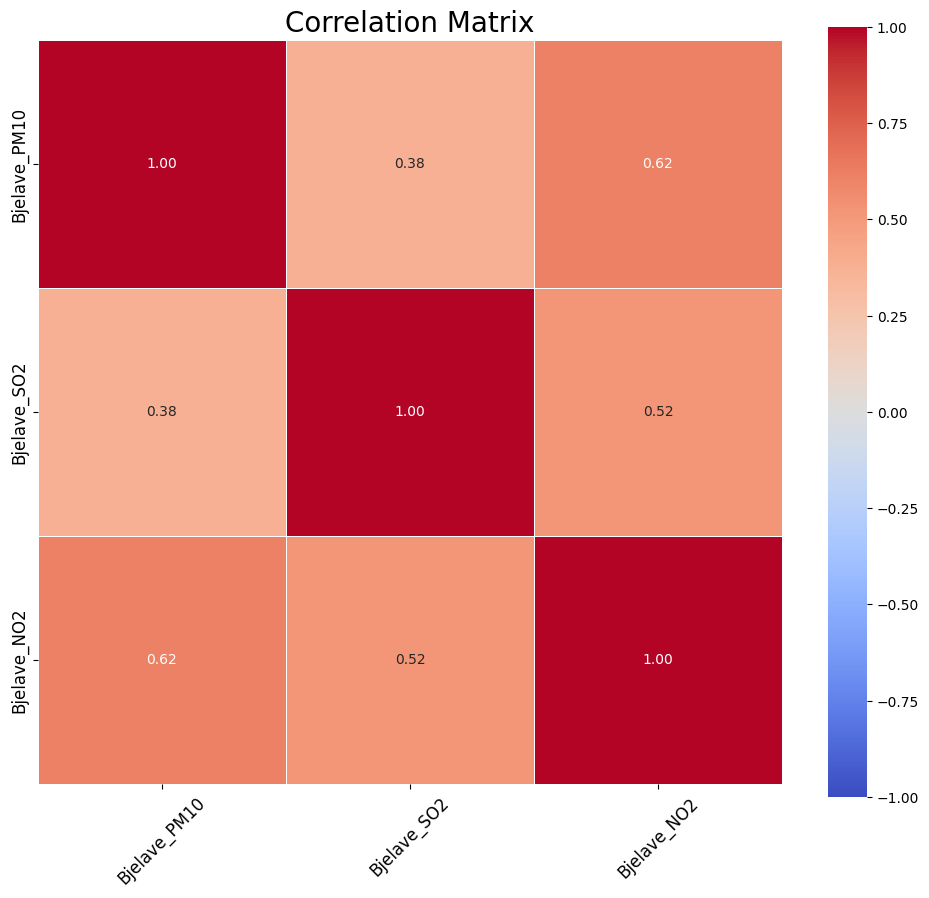

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns with index 1 to 13
selected_columns = df_processed_combined_data_daily.iloc[:, 9:]

# Calculate correlation matrix
correlation_matrix = selected_columns.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

# Dataset splitting

In [ ]:
def train_test_split(df, date):
    df = df.copy()
    train_data = df[df['DateTime'] < date].copy()
    test_data = df[df['DateTime'] >= date].copy() # df.DateTime = df.DateTime.dt.strftime('%d/%m/%Y %H:%M')
    return train_data, test_data

def train_test_split_from_to(df, start_date, end_date, slice_date):
    df = df.copy()
    train_data = df[(df['DateTime'] >= start_date) & (df['DateTime'] < slice_date)].copy()
    test_data = df[(df['DateTime'] >= slice_date) & (df['DateTime'] <= end_date)].copy()
    return train_data, test_data

def plot_train_test_data(train_data, test_data, date_column, label):
    plt.figure(figsize=(20,10))
    plt.plot(train_data[date_column], train_data[label], color='blue', label='Train Data')
    plt.plot(test_data[date_column], test_data[label], color='orange', label='Test Data')
    plt.xlabel(date_column)
    plt.ylabel(label)
    plt.title(label + ' Train and Test Data')
    plt.legend()
    plt.show()

In [ ]:
#input window = 30
date = df_aqi_daily['DateTime'].max() - pd.Timedelta(days=30)
train_data_aqi_ws_thirty, test_data_aqi_ws_thirty = train_test_split(df_aqi_daily, date) #

date = df_processed_combined_data_daily['DateTime'].max() - pd.Timedelta(days=30)
train_data_combined_ws_thirty, test_data_combined_ws_thirty = train_test_split(df_processed_combined_data_daily, date) #

#input window = 60
date = df_aqi_daily['DateTime'].max() - pd.Timedelta(days=60)
train_data_aqi_ws_sixty, test_data_aqi_ws_sixty = train_test_split(df_aqi_daily, date) #

date = df_processed_combined_data_daily['DateTime'].max() - pd.Timedelta(days=60)
train_data_combined_ws_sixty, test_data_combined_ws_sixty = train_test_split(df_processed_combined_data_daily, date)

#input window = 90
date = df_aqi_daily['DateTime'].max() - pd.Timedelta(days=90)
train_data_aqi_ws_ninety, test_data_aqi_ws_ninety = train_test_split(df_aqi_daily, date) #

date = df_processed_combined_data_daily['DateTime'].max() - pd.Timedelta(days=90)
train_data_combined_ws_ninety, test_data_combined_ws_ninety = train_test_split(df_processed_combined_data_daily, date) #

In [ ]:
#plot_train_test_data(train_data_aqi_ws_thirty, test_data_aqi_ws_thirty, 'DateTime', 'AQI')
#plot_train_test_data(train_data_aqi_ws_sixty, test_data_aqi_ws_sixty, 'DateTime', 'AQI')
#plot_train_test_data(train_data_aqi_ws_ninety, test_data_aqi_ws_ninety, 'DateTime', 'AQI')

In [282]:
#plot_train_test_data(train_data_combined_ws_thirty, test_data_combined_ws_thirty, 'DateTime', 'Bjelave_PM10')
#plot_train_test_data(train_data_combined_ws_sixty, test_data_combined_ws_sixty, 'DateTime', 'Bjelave_PM10')
#plot_train_test_data(train_data_combined_ws_ninety, test_data_combined_ws_ninety, 'DateTime', 'Bjelave_PM10')

# Univariate Time Series Forecasting using FBProphet

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

def train_prophet(train_data):
    model = Prophet()
    model.fit(train_data)
    return model

def predict_prophet(model, test_data):
    forecast = model.predict(test_data)
    return forecast

def calculate_metrics(test, forecast, true_label='y', predicted_label='yhat'):
    mae = mean_absolute_error(test[true_label], forecast[predicted_label])
    mse = mean_squared_error(test[true_label], forecast[predicted_label])
    rmse = sqrt(mse)
    r2 = r2_score(test[true_label], forecast[predicted_label])
    return rmse, mae, r2

def plot_boxplot(prediction_data, test_data):
    error = abs(prediction_data - test_data)
    # plot boxplot of error
    plt.figure(figsize=(10,6))
    plt.boxplot(error)
    plt.show()

In [ ]:
train_data_aqi_ws_thirty.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)
test_data_aqi_ws_thirty.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)

train_data_aqi_ws_sixty.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)
test_data_aqi_ws_sixty.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)

train_data_aqi_ws_ninety.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)
test_data_aqi_ws_ninety.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)

In [ ]:
#train_data_aqi_ws_thirty_scaled_with_datetime.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)
#test_data_aqi_ws_thirty_scaled_with_datetime.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)

#train_data_aqi_ws_sixty_scaled_with_datetime.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)
#test_data_aqi_ws_sixty_scaled_with_datetime.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)

#train_data_aqi_ws_ninety_scaled_with_datetime.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)
#test_data_aqi_ws_ninety_scaled_with_datetime.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)

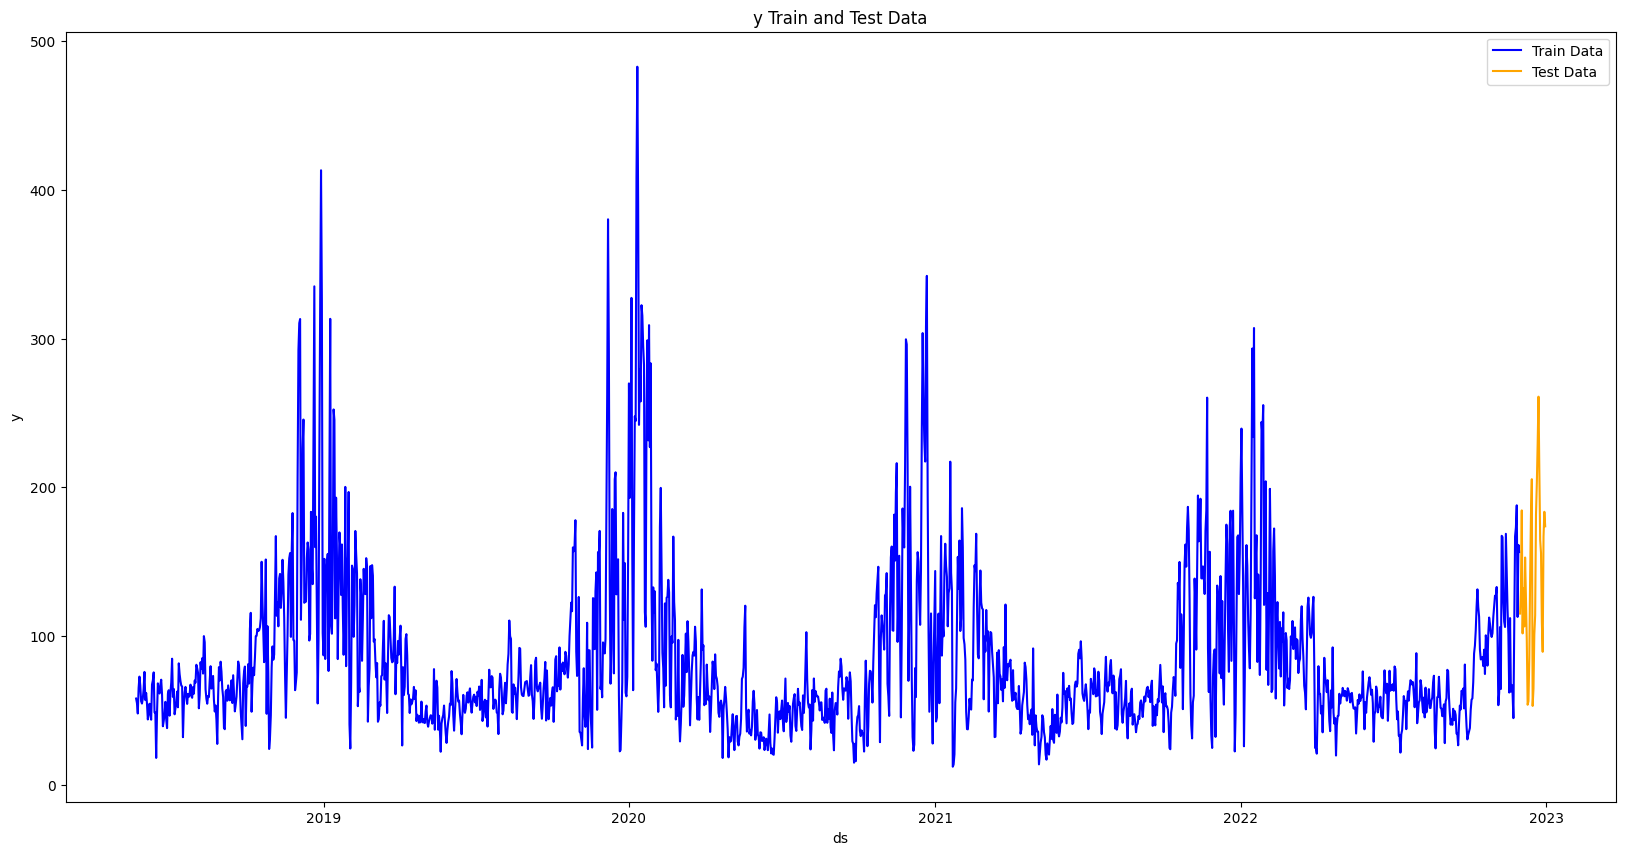

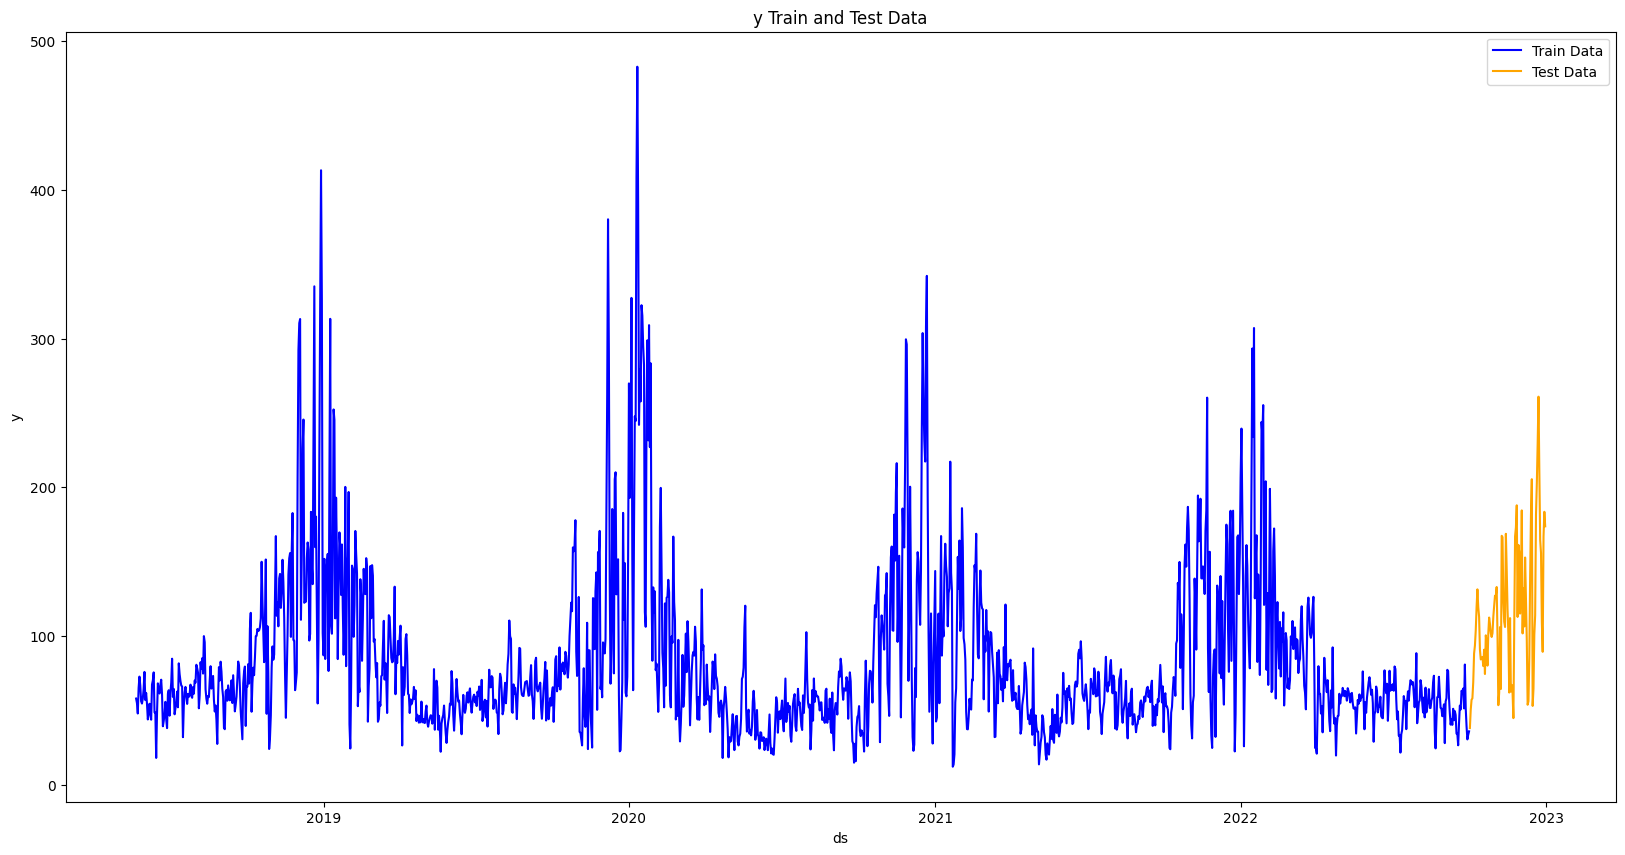

In [ ]:
plot_train_test_data(train_data_aqi_ws_thirty, test_data_aqi_ws_thirty, 'ds', 'y')
plot_train_test_data(train_data_aqi_ws_sixty, test_data_aqi_ws_sixty, 'ds', 'y')
plot_train_test_data(train_data_aqi_ws_ninety, test_data_aqi_ws_ninety, 'ds', 'y')

In [ ]:
#plot_train_test_data(train_data_aqi_ws_thirty_scaled_with_datetime, test_data_aqi_ws_thirty_scaled_with_datetime, 'ds', 'y')
#plot_train_test_data(train_data_aqi_ws_sixty_scaled_with_datetime, test_data_aqi_ws_sixty_scaled_with_datetime, 'ds', 'y')
#plot_train_test_data(train_data_aqi_ws_ninety_scaled_with_datetime, test_data_aqi_ws_ninety_scaled_with_datetime, 'ds', 'y')

In [ ]:
model_aqi_ws_thirty = train_prophet(train_data_aqi_ws_thirty)
forecast_aqi_ws_thirty = predict_prophet(model_aqi_ws_thirty, test_data_aqi_ws_thirty)
rmse, mae, r2 = calculate_metrics(test_data_aqi_ws_thirty, forecast_aqi_ws_thirty)

print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o57k4of/2ci5kwvh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o57k4of/m44p26mh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25591', 'data', 'file=/tmp/tmp_o57k4of/2ci5kwvh.json', 'init=/tmp/tmp_o57k4of/m44p26mh.json', 'output', 'file=/tmp/tmp_o57k4of/prophet_modelkl5iwr8c/prophet_model-20250810181109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:11:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:11:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 53.679
MAE: 45.150
R2: -0.016


In [ ]:
#model_aqi_ws_thirty_scaled = train_prophet(train_data_aqi_ws_thirty_scaled_with_datetime)
#forecast_aqi_ws_thirty_scaled = predict_prophet(model_aqi_ws_thirty_scaled, test_data_aqi_ws_thirty_scaled_with_datetime)
#forecast_aqi_ws_thirty_inverse_transformed=scaler_aqi_ws_thirty.inverse_transform(forecast_aqi_ws_thirty_scaled.drop(columns=['ds'], inplace=False))
#forecast_aqi_ws_thirty_inverse_transformed=pd.DataFrame(forecast_aqi_ws_thirty_inverse_transformed, columns=forecast_aqi_ws_thirty_scaled.drop(columns=['ds'], inplace=False).columns)
#test_data_aqi_ws_thirty_scaled_with_datetime_inverse_transformed=scaler_aqi_ws_thirty.inverse_transform(test_data_aqi_ws_thirty_scaled_with_datetime.drop(columns=['ds'], inplace=False))
#test_data_aqi_ws_thirty_scaled_with_datetime_inverse_transformed=pd.DataFrame(test_data_aqi_ws_thirty_scaled_with_datetime_inverse_transformed, columns=test_data_aqi_ws_thirty_scaled_with_datetime.drop(columns=['ds'], inplace=False).columns)

#rmse, mae, r2 = calculate_metrics(test_data_aqi_ws_thirty_scaled_with_datetime_inverse_transformed, forecast_aqi_ws_thirty_inverse_transformed)

#print('RMSE: %.3f' % rmse)
#print('MAE: %.3f' % mae)
#print('R2: %.3f' % r2)

In [ ]:
forecast_aqi_ws_thirty['yhat'].tail(1)

30    154.700941
Name: yhat, dtype: float64

In [ ]:
model_aqi_ws_sixty = train_prophet(train_data_aqi_ws_sixty)
forecast_aqi_ws_sixty = predict_prophet(model_aqi_ws_sixty, test_data_aqi_ws_sixty)
rmse, mae, r2 = calculate_metrics(test_data_aqi_ws_sixty, forecast_aqi_ws_sixty)

print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o57k4of/__rzyurp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o57k4of/qe4muqkp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12704', 'data', 'file=/tmp/tmp_o57k4of/__rzyurp.json', 'init=/tmp/tmp_o57k4of/qe4muqkp.json', 'output', 'file=/tmp/tmp_o57k4of/prophet_modelaces5amr/prophet_model-20250810181109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:11:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:11:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 47.338
MAE: 39.186
R2: 0.074


In [ ]:
#model_aqi_ws_sixty_scaled = train_prophet(train_data_aqi_ws_sixty_scaled_with_datetime)
#forecast_aqi_ws_sixty_scaled = predict_prophet(model_aqi_ws_sixty_scaled, test_data_aqi_ws_sixty_scaled_with_datetime)

#forecast_aqi_ws_sixty_inverse_transformed=scaler_aqi_ws_sixty.inverse_transform(forecast_aqi_ws_sixty_scaled.drop(columns=['ds'], inplace=False))
#forecast_aqi_ws_sixty_inverse_transformed=pd.DataFrame(forecast_aqi_ws_sixty_inverse_transformed, columns=forecast_aqi_ws_sixty_scaled.drop(columns=['ds'], inplace=False).columns)
#test_data_aqi_ws_sixty_scaled_with_datetime_inverse_transformed=scaler_aqi_ws_sixty.inverse_transform(test_data_aqi_ws_sixty_scaled_with_datetime.drop(columns=['ds'], inplace=False))
#test_data_aqi_ws_sixty_scaled_with_datetime_inverse_transformed=pd.DataFrame(test_data_aqi_ws_sixty_scaled_with_datetime_inverse_transformed, columns=test_data_aqi_ws_sixty_scaled_with_datetime.drop(columns=['ds'], inplace=False).columns)

#rmse, mae, r2 = calculate_metrics(test_data_aqi_ws_sixty_scaled_with_datetime_inverse_transformed, forecast_aqi_ws_sixty_inverse_transformed)

#print('RMSE: %.3f' % rmse)
#print('MAE: %.3f' % mae)
#print('R2: %.3f' % r2)

In [ ]:
model_aqi_ws_ninety = train_prophet(train_data_aqi_ws_ninety)
forecast_aqi_ws_ninety = predict_prophet(model_aqi_ws_ninety, test_data_aqi_ws_ninety)
rmse, mae, r2 = calculate_metrics(test_data_aqi_ws_ninety, forecast_aqi_ws_ninety)

print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o57k4of/97vh_xxh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o57k4of/qgo2vvhc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67634', 'data', 'file=/tmp/tmp_o57k4of/97vh_xxh.json', 'init=/tmp/tmp_o57k4of/qgo2vvhc.json', 'output', 'file=/tmp/tmp_o57k4of/prophet_modell0ppkyma/prophet_model-20250810181110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:11:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:11:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 40.866
MAE: 31.299
R2: 0.188


In [ ]:
#model_aqi_ws_ninety_scaled = train_prophet(train_data_aqi_ws_ninety_scaled_with_datetime)
#forecast_aqi_ws_ninety_scaled = predict_prophet(model_aqi_ws_ninety_scaled, test_data_aqi_ws_ninety_scaled_with_datetime)

#forecast_aqi_ws_ninety_inverse_transformed=scaler_aqi_ws_ninety.inverse_transform(forecast_aqi_ws_ninety_scaled.drop(columns=['ds'], inplace=False))
#forecast_aqi_ws_ninety_inverse_transformed=pd.DataFrame(forecast_aqi_ws_ninety_inverse_transformed, columns=forecast_aqi_ws_ninety_scaled.drop(columns=['ds'], inplace=False).columns)

#test_data_aqi_ws_ninety_scaled_with_datetime_inverse_transformed=scaler_aqi_ws_ninety.inverse_transform(test_data_aqi_ws_ninety_scaled_with_datetime.drop(columns=['ds'], inplace=False))
#test_data_aqi_ws_ninety_scaled_with_datetime_inverse_transformed=pd.DataFrame(test_data_aqi_ws_ninety_scaled_with_datetime_inverse_transformed, columns=test_data_aqi_ws_ninety_scaled_with_datetime.drop(columns=['ds'], inplace=False).columns)

#rmse, mae, r2 = calculate_metrics(test_data_aqi_ws_ninety_scaled_with_datetime_inverse_transformed, forecast_aqi_ws_ninety_inverse_transformed)

#print('RMSE: %.3f' % rmse)
#print('MAE: %.3f' % mae)
#print('R2: %.3f' % r2)

In [ ]:
plot_forecast(test_data_aqi_ws_thirty, forecast_aqi_ws_thirty)
plot_boxplot(forecast_aqi_ws_thirty['yhat'].values.reshape(-1,1), test_data_aqi_ws_thirty['y'].values.reshape(-1,1))
#plot_forecast(test_data_aqi_ws_thirty, model_aqi_ws_thirty)
#plot_boxplot(model_aqi_ws_thirty['yhat'].values.reshape(-1,1), test_data_aqi_ws_thirty['y'].values.reshape(-1,1))

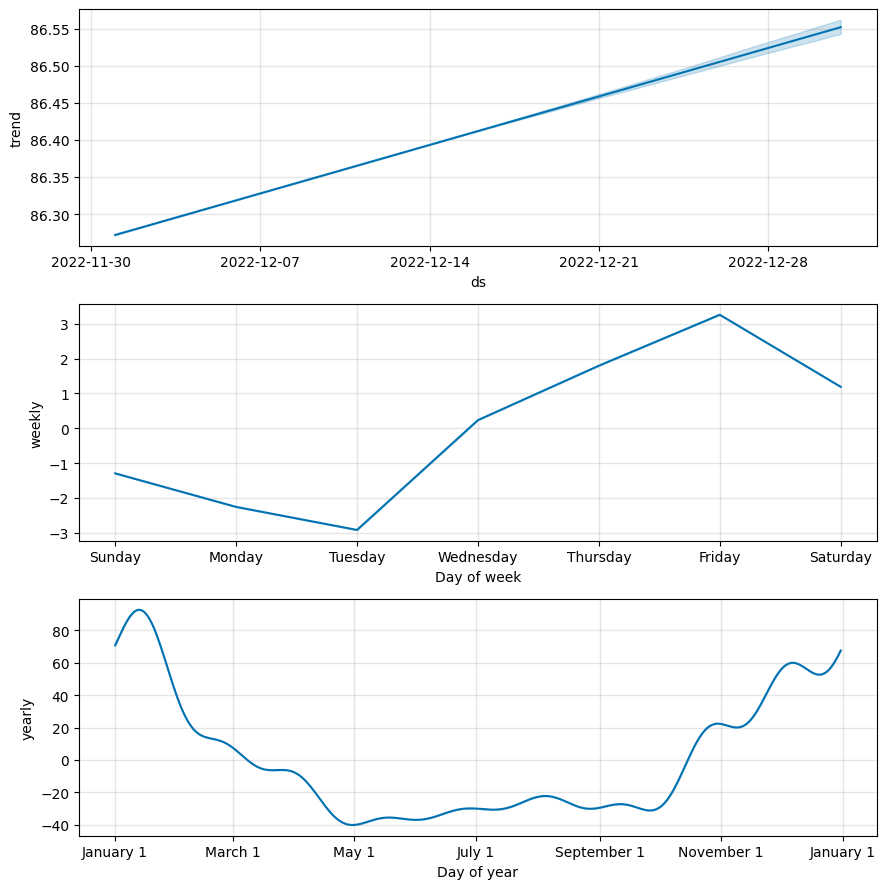

In [ ]:
# Visualizing the components of the forecast, such as the trend, yearly seasonality, and weekly seasonality. This can be done using the 'plot_components' method of the Prophet model
model_aqi_ws_thirty.plot_components(forecast_aqi_ws_thirty)
plt.show()

In [ ]:
print(forecast_aqi_ws_thirty[['ds', 'yhat', 'trend', 'yearly', 'weekly']].head(2))

          ds        yhat      trend     yearly    weekly
0 2022-12-01  143.457093  86.271794  55.387452  1.797846
1 2022-12-02  146.318489  86.281132  56.774277  3.263080


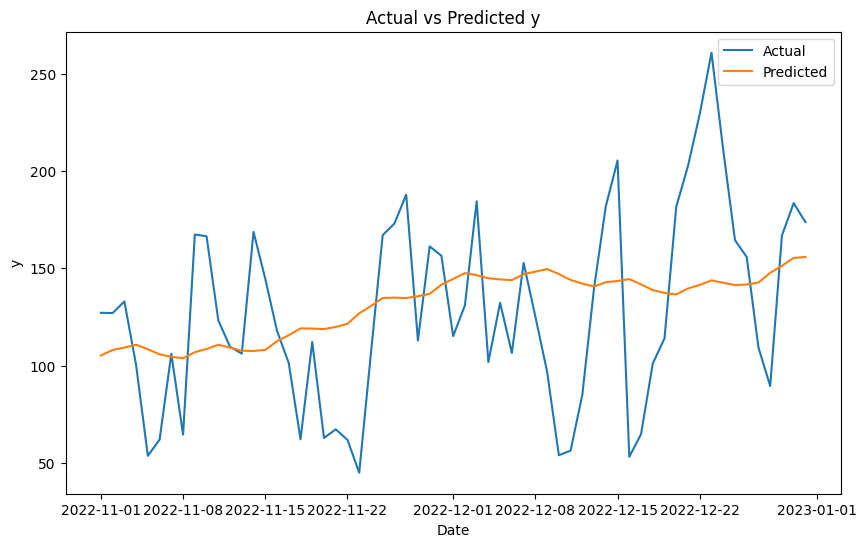

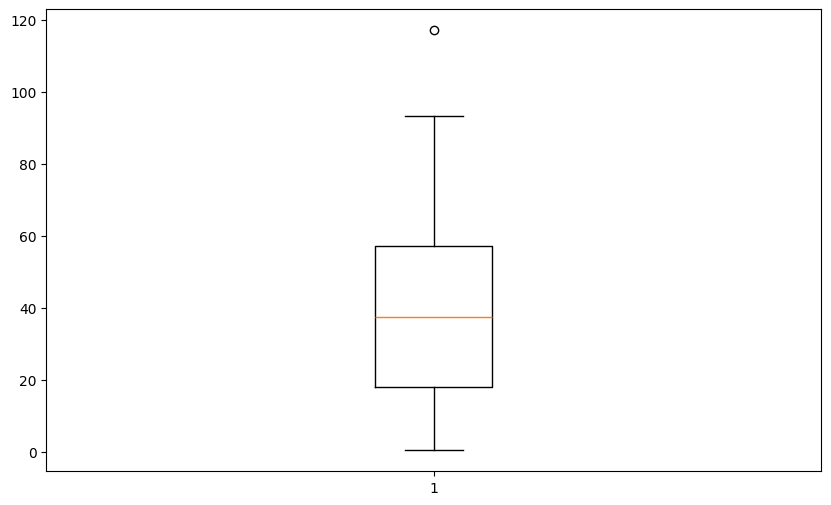

In [ ]:
plot_forecast(test_data_aqi_ws_sixty, forecast_aqi_ws_sixty)
plot_boxplot(forecast_aqi_ws_sixty['yhat'].values.reshape(-1,1), test_data_aqi_ws_sixty['y'].values.reshape(-1,1))

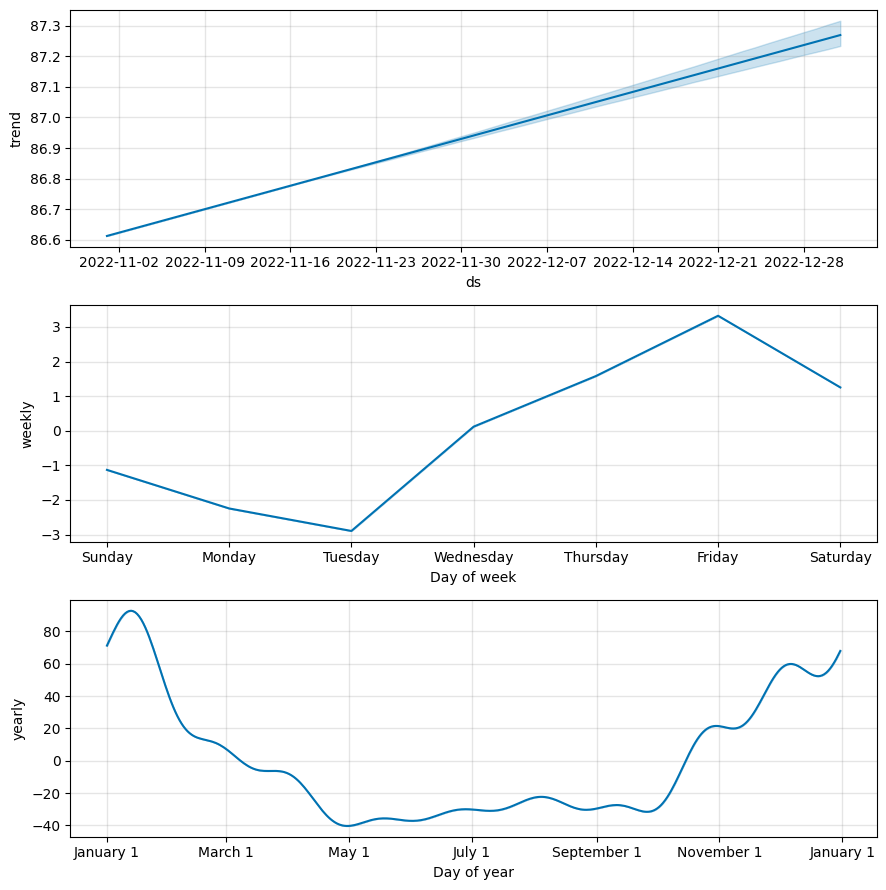

In [ ]:
model_aqi_ws_sixty.plot_components(forecast_aqi_ws_sixty)
plt.show()

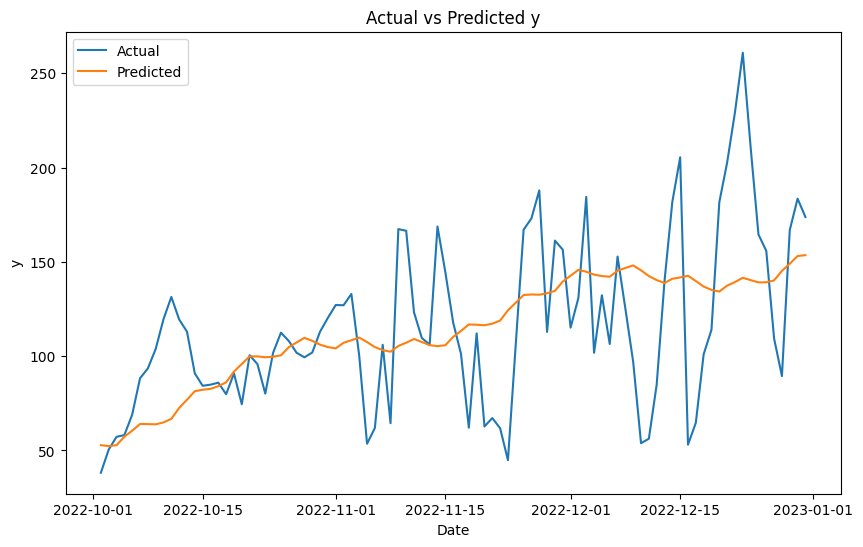

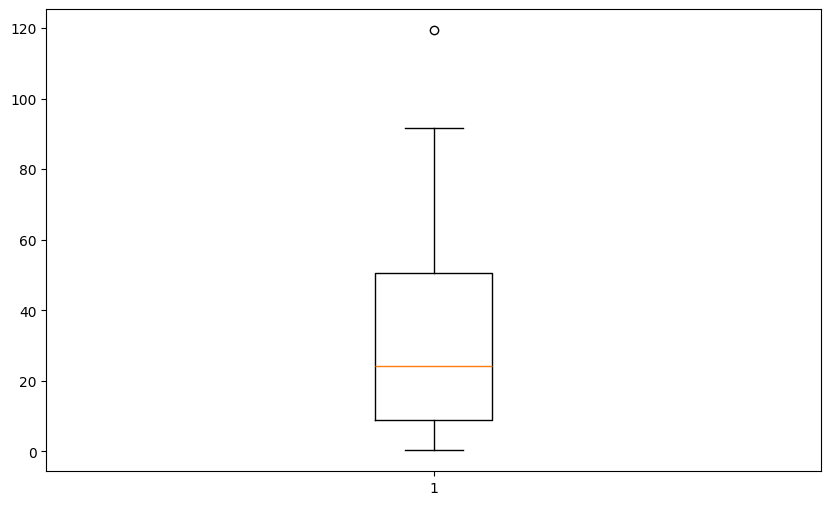

In [ ]:
plot_forecast(test_data_aqi_ws_ninety, forecast_aqi_ws_ninety)
plot_boxplot(forecast_aqi_ws_ninety['yhat'].values.reshape(-1,1), test_data_aqi_ws_ninety['y'].values.reshape(-1,1))

In [ ]:
model_aqi_ws_ninety.plot_components(forecast_aqi_ws_ninety)
plt.show()

# Multivariate Time Series Forecasting using FBProphet

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [ ]:
train_data_combined_ws_thirty.rename(columns={'DateTime': 'ds', 'Bjelave_PM10': 'y'}, inplace=True)
test_data_combined_ws_thirty.rename(columns={'DateTime': 'ds', 'Bjelave_PM10': 'y'}, inplace=True)

train_data_combined_ws_sixty.rename(columns={'DateTime': 'ds', 'Bjelave_PM10': 'y'}, inplace=True)
test_data_combined_ws_sixty.rename(columns={'DateTime': 'ds', 'Bjelave_PM10': 'y'}, inplace=True)

train_data_combined_ws_ninety.rename(columns={'DateTime': 'ds', 'Bjelave_PM10': 'y'}, inplace=True)
test_data_combined_ws_ninety.rename(columns={'DateTime': 'ds', 'Bjelave_PM10': 'y'}, inplace=True)

In [ ]:
def train_prophet_multivariate(train_data):
    model = Prophet()
    #added
    model.add_regressor('wind_speed')
    model.add_regressor('wind_direction')
    model.add_regressor('precipitation')
    model.add_regressor('pressure')
    model.add_regressor('temperature')
    model.add_regressor('humidity')
    model.add_regressor('visibility')
    model.add_regressor('cloudiness') #model.add_regressor('Bjelave_PM10')
    model.add_regressor('Bjelave_SO2')
    model.add_regressor('Bjelave_NO2')
    #added
    model.fit(train_data)
    return model

In [ ]:
model_combined_ws_thirty = train_prophet_multivariate(train_data_combined_ws_thirty)
forecast_combined_ws_thirty = predict_prophet(model_combined_ws_thirty, test_data_combined_ws_thirty)
rmse, mae, r2 = calculate_metrics(test_data_combined_ws_thirty, forecast_combined_ws_thirty)

print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o57k4of/xv70ncj1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o57k4of/o1p00y9z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43174', 'data', 'file=/tmp/tmp_o57k4of/xv70ncj1.json', 'init=/tmp/tmp_o57k4of/o1p00y9z.json', 'output', 'file=/tmp/tmp_o57k4of/prophet_modelo3eamygj/prophet_model-20250810181116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:11:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:11:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 27.263
MAE: 23.775
R2: 0.642


In [ ]:
#plot_forecast(test_data_combined_ws_thirty, forecast_combined_ws_thirty, "DateTime", "Bjelave_PM10")
plot_forecast(test_data_combined_ws_thirty, forecast_combined_ws_thirty)
#plot_boxplot(forecast_combined_ws_thirty['yhat'].values.reshape(-1,1), test_data_combined_ws_thirty['y'].values.reshape(-1,1))

In [ ]:
model_combined_ws_sixty = train_prophet_multivariate(train_data_combined_ws_sixty)
forecast_combined_ws_sixty = predict_prophet(model_combined_ws_sixty, test_data_combined_ws_sixty)
rmse, mae, r2 = calculate_metrics(test_data_combined_ws_sixty, forecast_combined_ws_sixty)

print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o57k4of/0v57n8a8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o57k4of/bgnr9bni.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49103', 'data', 'file=/tmp/tmp_o57k4of/0v57n8a8.json', 'init=/tmp/tmp_o57k4of/bgnr9bni.json', 'output', 'file=/tmp/tmp_o57k4of/prophet_modelpjpkxk8i/prophet_model-20250810181116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:11:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:11:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 23.005
MAE: 19.175
R2: 0.656


In [ ]:
plot_forecast(test_data_combined_ws_sixty, forecast_combined_ws_sixty)
plot_boxplot(forecast_combined_ws_sixty['yhat'].values.reshape(-1,1), test_data_combined_ws_sixty['y'].values.reshape(-1,1))

In [ ]:
model_combined_ws_ninety = train_prophet_multivariate(train_data_combined_ws_ninety)
forecast_combined_ws_ninety = predict_prophet(model_combined_ws_ninety, test_data_combined_ws_ninety)
rmse, mae, r2 = calculate_metrics(test_data_combined_ws_ninety, forecast_combined_ws_ninety)

print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o57k4of/640ehg_w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o57k4of/xv6rvkkd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20208', 'data', 'file=/tmp/tmp_o57k4of/640ehg_w.json', 'init=/tmp/tmp_o57k4of/xv6rvkkd.json', 'output', 'file=/tmp/tmp_o57k4of/prophet_modelgwi6huhq/prophet_model-20250810181117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:11:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:11:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 19.747
MAE: 15.691
R2: 0.668


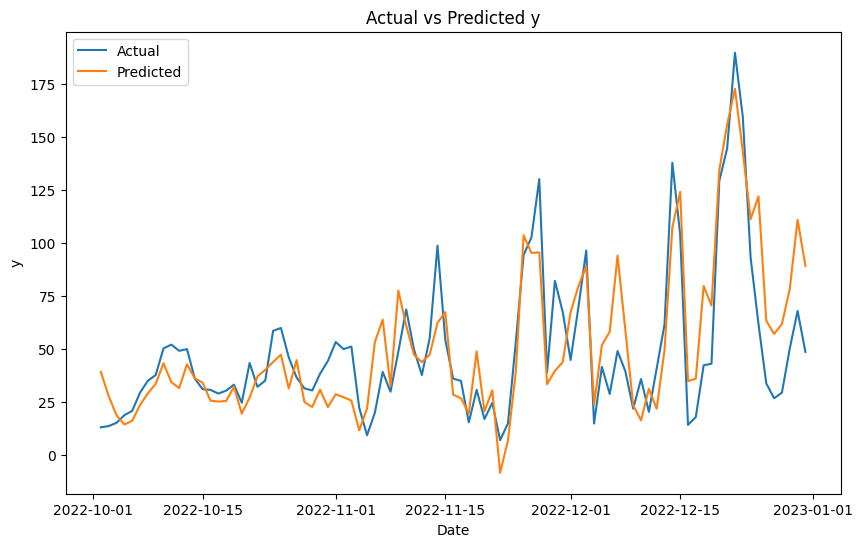

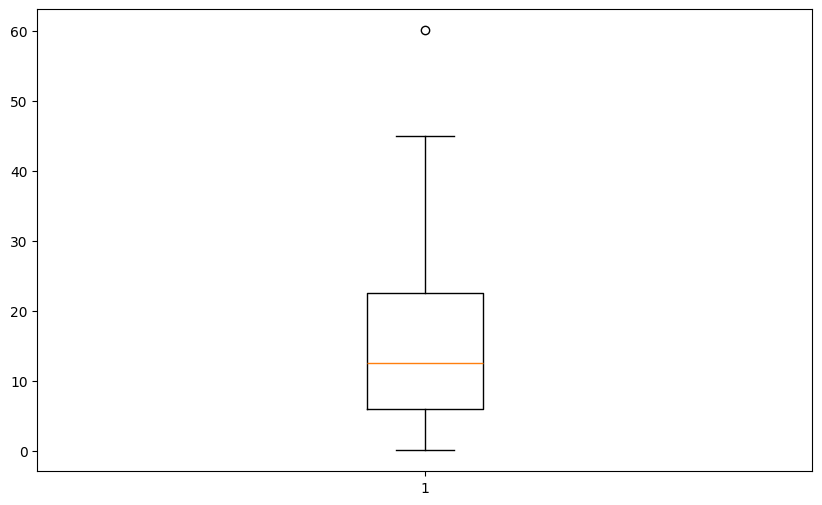

In [ ]:
plot_forecast(test_data_combined_ws_ninety, forecast_combined_ws_ninety)
plot_boxplot(forecast_combined_ws_ninety['yhat'].values.reshape(-1,1), test_data_combined_ws_ninety['y'].values.reshape(-1,1))

In [ ]:
forecast_combined_ws_thirty.head(3)

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2022-12-01  40.868372   37.462578  101.560537    40.868372    40.868372   
1 2022-12-02  40.869160   51.441125  113.415794    40.869160    40.869160   
2 2022-12-03  40.869947   59.879701  121.871713    40.869947    40.869947   

   Bjelave_NO2  Bjelave_NO2_lower  Bjelave_NO2_upper  Bjelave_SO2  ...  \
0     3.652689           3.652689           3.652689     0.207659  ...   
1    12.648976          12.648976          12.648976     0.243960  ...   
2    18.338473          18.338473          18.338473     0.200989  ...   

   wind_speed  wind_speed_lower  wind_speed_upper    yearly  yearly_lower  \
0   10.186200         10.186200         10.186200  6.052508      6.052508   
1   10.891241         10.891241         10.891241  7.123472      7.123472   
2    5.209436          5.209436          5.209436  8.151783      8.151783   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0      6.052508                   0.0                         0.0   
1      7.123472                   0.0                         0.0   
2      8.151783                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  69.780475  
1                         0.0  81.986935  
2                         0.0  91.708626  

[3 rows x 52 columns]

In [ ]:
forecast_combined_ws_sixty.head(3)

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2022-11-01  39.693774   -1.104884   64.834625    39.693774    39.693774   
1 2022-11-02  39.690942   -0.712146   60.762179    39.690942    39.690942   
2 2022-11-03  39.688110   -7.152253   57.115204    39.688110    39.688110   

   Bjelave_NO2  Bjelave_NO2_lower  Bjelave_NO2_upper  Bjelave_SO2  ...  \
0    -2.599234          -2.599234          -2.599234    -0.033622  ...   
1    -2.599234          -2.599234          -2.599234    -0.033785  ...   
2    -2.599234          -2.599234          -2.599234    -0.026902  ...   

   wind_speed  wind_speed_lower  wind_speed_upper     yearly  yearly_lower  \
0   -0.467495         -0.467495         -0.467495 -13.988770    -13.988770   
1    0.926215          0.926215          0.926215 -13.881666    -13.881666   
2    3.373229          3.373229          3.373229 -13.765501    -13.765501   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0    -13.988770                   0.0                         0.0   
1    -13.881666                   0.0                         0.0   
2    -13.765501                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  29.901245  
1                         0.0  28.517464  
2                         0.0  26.647443  

[3 rows x 52 columns]

In [ ]:
forecast_combined_ws_ninety.head(3)

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2022-10-02  39.099596    8.172333   74.287152    39.099596    39.099596   
1 2022-10-03  39.096535   -3.984915   60.911595    39.096535    39.096535   
2 2022-10-04  39.093475  -14.278165   50.813962    39.093475    39.093475   

   Bjelave_NO2  Bjelave_NO2_lower  Bjelave_NO2_upper  Bjelave_SO2  ...  \
0   -12.273580         -12.273580         -12.273580    -0.026721  ...   
1   -10.136543         -10.136543         -10.136543    -0.026702  ...   
2    -6.218280          -6.218280          -6.218280    -0.020960  ...   

   wind_speed  wind_speed_lower  wind_speed_upper    yearly  yearly_lower  \
0    6.950146          6.950146          6.950146 -8.585751     -8.585751   
1    4.280703          4.280703          4.280703 -8.876651     -8.876651   
2    8.141129          8.141129          8.141129 -9.217616     -9.217616   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0     -8.585751                   0.0                         0.0   
1     -8.876651                   0.0                         0.0   
2     -9.217616                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  39.088045  
1                         0.0  27.676948  
2                         0.0  18.722152  

[3 rows x 52 columns]

In [ ]:
def plot_forecast_mod(test, forecast, date_col='ds', true_label='y', predicted_label='yhat', title_label='y'):
    plt.figure(figsize=(10, 6))
    plt.plot(test[date_col], test[true_label], label='Actual')
    plt.plot(test[date_col], forecast[predicted_label], label='Predicted')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel(true_label)
    plt.title('Actual vs Predicted ' + title_label)
    plt.show()

In [ ]:
df_processed_combined_data_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateTime        1826 non-null   datetime64[ns]
 1   wind_speed      1826 non-null   float64       
 2   wind_direction  1826 non-null   float64       
 3   precipitation   1826 non-null   float64       
 4   pressure        1826 non-null   float64       
 5   temperature     1826 non-null   float64       
 6   humidity        1826 non-null   float64       
 7   visibility      1826 non-null   float64       
 8   cloudiness      1826 non-null   float64       
 9   Bjelave_PM10    1826 non-null   float64       
 10  Bjelave_SO2     1826 non-null   float64       
 11  Bjelave_NO2     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 171.3 KB


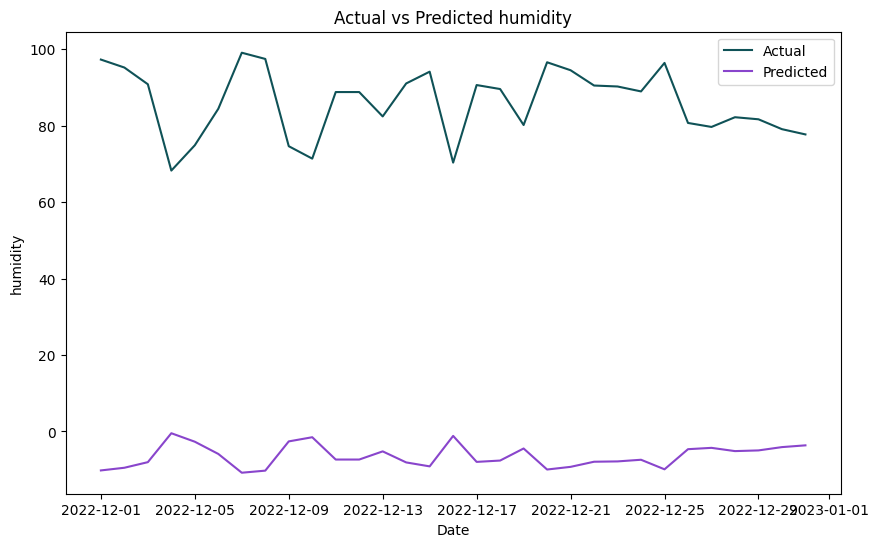

In [283]:
meteorological_data  = [
    'wind_speed',
   # 'wind_direction',
   # 'precipitation',
   # 'pressure',
   # 'temperature',
    'humidity',
   # 'visibility',
    'cloudiness'
]
for var in meteorological_data:
    plot_forecast_mod(
        test_data_combined_ws_thirty,
        forecast_combined_ws_thirty,
        date_col='ds',
        true_label=var,
        predicted_label=var
    )

# Prerequisites and Data Preparation for SHAP Analysis of Facebook Prophet Models

In [ ]:
len(train_data_aqi_ws_thirty)/6

275.6666666666667

In [ ]:
import shap
#num_samples=int(len(train_data_aqi_ws_thirty)/6)
num_samples=100
len_train_data=len(train_data_aqi_ws_thirty) #int(len(train_data_aqi_ws_thirty)/5)

background_data_combined_ws_thirty = shap.sample(train_data_combined_ws_thirty, num_samples)
background_data_combined_ws_sixty= shap.sample(train_data_combined_ws_sixty, num_samples)
background_data_combined_ws_ninety = shap.sample(train_data_combined_ws_ninety, num_samples)

#background_data_combined_ws_thirty_scaled_with_datetime  = shap.sample(train_data_combined_ws_thirty_scaled_with_datetime, num_samples)
#background_data_combined_ws_sixty_scaled_with_datetime  = shap.sample(train_data_combined_ws_sixty_scaled_with_datetime, num_samples)
#background_data_combined_ws_ninety_scaled_with_datetime = shap.sample(train_data_combined_ws_ninety_scaled_with_datetime, num_samples)

#print("len(background_data_ws_aqi_thirty): ", len(background_data_aqi_ws_thirty))
#print("len(background_data_combined_ws_thirty): ", len(background_data_combined_ws_thirty))
#print("len(train_data_aqi_ws_thirty): ", len(train_data_aqi_ws_thirty))

#print("\nlen(background_data_aqi_ws_sixty): ", len(background_data_aqi_ws_sixty))
#print("len(background_data_combined_ws_sixty): ", len(background_data_combined_ws_sixty))
#print("len(train_data_aqi_ws_sixty): ", len(train_data_aqi_ws_sixty))

#print("\nlen(background_data_aqi_ws_ninety): ", len(background_data_aqi_ws_ninety))
#print("len(background_data_combined_ws_ninety): ", len(background_data_combined_ws_ninety))
#print("len(train_data_aqi_ws_ninety): ", len(train_data_aqi_ws_ninety))


In [ ]:
background_data_aqi_ws_thirty = shap.sample(train_data_aqi_ws_thirty, num_samples)
background_data_aqi_ws_sixty= shap.sample(train_data_aqi_ws_sixty, num_samples)
background_data_aqi_ws_ninety = shap.sample(train_data_aqi_ws_ninety, num_samples)

In [ ]:
background_data_combined_ws_ninety.tail(1)

ds  wind_speed  wind_direction  precipitation  pressure  \
1288 2021-07-12       1.575      202.833333            0.0  941.7375   

      temperature   humidity  visibility  cloudiness          y  Bjelave_SO2  \
1288    23.816667  58.041667     19525.0         0.7  29.514776    14.762154   

      Bjelave_NO2  
1288    15.139171

In [ ]:
feature_columns_combined=['ds', 'y','wind_speed','wind_direction','precipitation','pressure', 'temperature','humidity','visibility','cloudiness','Bjelave_SO2','Bjelave_NO2']
feature_columns_aqi=['ds','y']

In [ ]:
def prophet_predict_ws_thirty_for_shap(data_df):
    if not isinstance(data_df, pd.DataFrame):
         data_df = pd.DataFrame(data_df, columns=feature_columns_aqi)
    predictions = model_aqi_ws_thirty.predict(data_df)
    return predictions['yhat'].values # Vrati samo yhat kao NumPy array


def prophet_predict_ws_sixty_for_shap(data_df):
    if not isinstance(data_df, pd.DataFrame):
         data_df = pd.DataFrame(data_df, columns=feature_columns_aqi)
    predictions = model_aqi_ws_sixty.predict(data_df)
    return predictions['yhat'].values


def prophet_predict_ws_ninety_for_shap(data_df):
    if not isinstance(data_df, pd.DataFrame):
         data_df = pd.DataFrame(data_df, columns=feature_columns_aqi)
    predictions = model_aqi_ws_ninety.predict(data_df)
    return predictions['yhat'].values

In [ ]:
feature_columns_combined

['ds',
 'y',
 'wind_speed',
 'wind_direction',
 'precipitation',
 'pressure',
 'temperature',
 'humidity',
 'visibility',
 'cloudiness',
 'Bjelave_SO2',
 'Bjelave_NO2']

In [ ]:
def prophet_predict_ws_thirty_for_shap_combined(data_df):
    if not isinstance(data_df, pd.DataFrame):
         data_df = pd.DataFrame(data_df, columns=feature_columns_combined)
    predictions = model_combined_ws_thirty.predict(data_df)
    return predictions['yhat'].values


def prophet_predict_ws_sixty_for_shap_combined(data_df):
    if not isinstance(data_df, pd.DataFrame):
         data_df = pd.DataFrame(data_df, columns=feature_columns_combined)
    predictions = model_combined_ws_sixty.predict(data_df)
    return predictions['yhat'].values


def prophet_predict_ws_ninety_for_shap_combined(data_df):
    if not isinstance(data_df, pd.DataFrame):
         data_df = pd.DataFrame(data_df, columns=feature_columns_combined)
    predictions = model_combined_ws_ninety.predict(data_df)
    return predictions['yhat'].values

In [ ]:
#train_data_aqi_ws_sixty.rename(columns={'DateTime': 'ds', 'Ambasada_PM2.5': 'y'}, inplace=True)\
data_aqi_to_explain_ws_thirty=test_data_aqi_ws_thirty.rename(columns={'y': 'yhat'})
data_aqi_to_explain_ws_sixty=test_data_aqi_ws_sixty.rename(columns={'y': 'yhat'})
data_aqi_to_explain_ws_ninety=test_data_aqi_ws_ninety.rename(columns={'y': 'yhat'})

day_aqi_to_explain_ws_thirty=test_data_aqi_ws_thirty.rename(columns={'y': 'yhat'}).tail(1)
day_aqi_to_explain_ws_sixty=test_data_aqi_ws_sixty.rename(columns={'y': 'yhat'}).tail(1)
day_aqi_to_explain_ws_ninety=test_data_aqi_ws_ninety.rename(columns={'y': 'yhat'}).tail(1)
#train_data_combined_ws_thirty_scaled_with_datetime

#data_aqi_to_explain_ws_thirty_scaled=test_data_aqi_ws_thirty_scaled_with_datetime.rename(columns={'y': 'yhat'})
#data_aqi_to_explain_ws_sixty_scaled=test_data_aqi_ws_sixty_scaled_with_datetime.rename(columns={'y': 'yhat'})
#data_aqi_to_explain_ws_ninety_scaled=test_data_aqi_ws_ninety_scaled_with_datetime.rename(columns={'y': 'yhat'})


#day_aqi_to_explain_ws_thirty_scaled=test_data_aqi_ws_thirty_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)
#day_aqi_to_explain_ws_sixty_scaled=test_data_aqi_ws_sixty_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)
#day_aqi_to_explain_ws_ninety_scaled=test_data_aqi_ws_ninety_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)


In [ ]:
"""
data_combined_to_explain_ws_thirty_scaled=test_data_combined_ws_thirty_scaled_with_datetime.rename(columns={'y': 'yhat'})
data_combined_to_explain_ws_sixty_scaled=test_data_combined_ws_sixty_scaled_with_datetime.rename(columns={'y': 'yhat'})
data_combined_to_explain_ws_ninety_scaled=test_data_combined_ws_ninety_scaled_with_datetime.rename(columns={'y': 'yhat'})
"""
data_combined_to_explain_ws_thirty=test_data_combined_ws_thirty.rename(columns={'y': 'yhat'})
data_combined_to_explain_ws_sixty=test_data_combined_ws_sixty.rename(columns={'y': 'yhat'})
data_combined_to_explain_ws_ninety=test_data_combined_ws_ninety.rename(columns={'y': 'yhat'})

day_combined_to_explain_ws_thirty=test_data_combined_ws_thirty.rename(columns={'y': 'yhat'}).tail(1)
day_combined_to_explain_ws_sixty=test_data_combined_ws_sixty.rename(columns={'y': 'yhat'}).tail(1)
day_combined_to_explain_ws_ninety=test_data_combined_ws_ninety.rename(columns={'y': 'yhat'}).tail(1)
"""
day_combined_to_explain_ws_thirty_scaled=test_data_combined_ws_thirty_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)
day_combined_to_explain_ws_sixty_scaled=test_data_combined_ws_sixty_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)
day_combined_to_explain_ws_ninety_scaled=test_data_combined_ws_ninety_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)
"""


"\nday_combined_to_explain_ws_thirty_scaled=test_data_combined_ws_thirty_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)\nday_combined_to_explain_ws_sixty_scaled=test_data_combined_ws_sixty_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)\nday_combined_to_explain_ws_ninety_scaled=test_data_combined_ws_ninety_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)\n"

In [ ]:
print("len(data_aqi_to_explain_ws_sixty)", len(data_aqi_to_explain_ws_sixty))
print("len(data_combined_to_explain_ws_sixty)", len(data_combined_to_explain_ws_sixty))

print("len(background_data_aqi_ws_sixty)", len(background_data_aqi_ws_sixty))

len(data_aqi_to_explain_ws_sixty) 61
len(data_combined_to_explain_ws_sixty) 61
len(background_data_aqi_ws_sixty) 100


# SHAP Analysis of Selected Prediction Days in Facebook Prophet Model

In [ ]:
import shap
explainer_day_aqi_ws_thirty = shap.KernelExplainer(prophet_predict_ws_thirty_for_shap, background_data_aqi_ws_thirty)
shap_values_day_aqi_ws_thirty = explainer_day_aqi_ws_thirty.shap_values(day_aqi_to_explain_ws_thirty)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
custom_feature_names = [ 'DateTime','Bjelave_PM10']

In [212]:
"""
explainer_day_aqi_ws_thirty_mod = shap.Explanation(
    values=shap_values_day_aqi_ws_thirty,
    base_values=np.array([explainer_day_aqi_ws_thirty.expected_value] * len(shap_values_day_aqi_ws_thirty)),
    data=day_aqi_to_explain_ws_thirty,
    feature_names=custom_feature_names
)

shap.plots.bar(explainer_day_aqi_ws_thirty_mod, max_display=2)
"""

'\nexplainer_day_aqi_ws_thirty_mod = shap.Explanation(\n    values=shap_values_day_aqi_ws_thirty,\n    base_values=np.array([explainer_day_aqi_ws_thirty.expected_value] * len(shap_values_day_aqi_ws_thirty)),\n    data=day_aqi_to_explain_ws_thirty,\n    feature_names=custom_feature_names\n)\n\nshap.plots.bar(explainer_day_aqi_ws_thirty_mod, max_display=2)\n'

In [213]:
#shap.plots.waterfall(explainer_day_aqi_ws_thirty_mod[0], max_display=2)
#shap.summary_plot(shap_values_day_aqi_ws_thirty, features=custom_feature_names)

In [214]:
#explainer_day_aqi_ws_sixty = shap.KernelExplainer(prophet_predict_ws_sixty_for_shap, background_data_aqi_ws_sixty)
#shap_values_day_aqi_ws_sixty = explainer_day_aqi_ws_thirty.shap_values(day_aqi_to_explain_ws_sixty)

In [215]:
"""
explainer_day_aqi_ws_sixty_mod = shap.Explanation(
    values=shap_values_day_aqi_ws_sixty,
    base_values=np.array([explainer_day_aqi_ws_sixty.expected_value] * len(shap_values_day_aqi_ws_sixty)),
    data=day_aqi_to_explain_ws_sixty,
    feature_names=custom_feature_names
)
shap.plots.bar(explainer_day_aqi_ws_sixty_mod, max_display=2)
"""

'\nexplainer_day_aqi_ws_sixty_mod = shap.Explanation(\n    values=shap_values_day_aqi_ws_sixty,\n    base_values=np.array([explainer_day_aqi_ws_sixty.expected_value] * len(shap_values_day_aqi_ws_sixty)),\n    data=day_aqi_to_explain_ws_sixty,\n    feature_names=custom_feature_names\n)\nshap.plots.bar(explainer_day_aqi_ws_sixty_mod, max_display=2)\n'

In [216]:
#shap.plots.waterfall(explainer_day_aqi_ws_sixty_mod[0], max_display=2)
#shap.summary_plot(shap_values_day_aqi_ws_sixty, features=custom_feature_names)

In [217]:
#explainer_day_aqi_ws_ninety = shap.KernelExplainer(prophet_predict_ws_ninety_for_shap, background_data_aqi_ws_ninety)
#shap_values_day_aqi_ws_ninety = explainer_day_aqi_ws_ninety.shap_values(day_aqi_to_explain_ws_ninety)

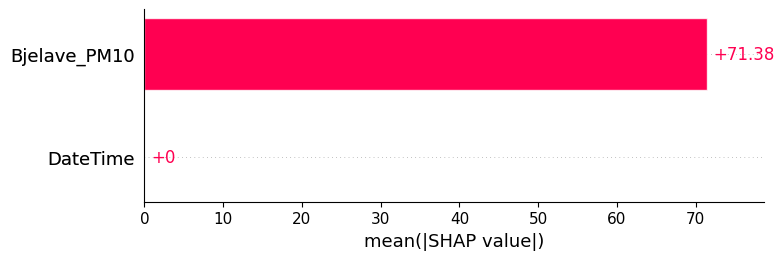

In [ ]:
explainer_day_aqi_ws_ninety_mod = shap.Explanation(
    values=shap_values_day_aqi_ws_ninety,
    base_values=np.array([explainer_day_aqi_ws_ninety.expected_value] * len(shap_values_day_aqi_ws_ninety)),
    data=day_aqi_to_explain_ws_ninety,
    feature_names=custom_feature_names
)
shap.plots.bar(explainer_day_aqi_ws_ninety_mod, max_display=2)

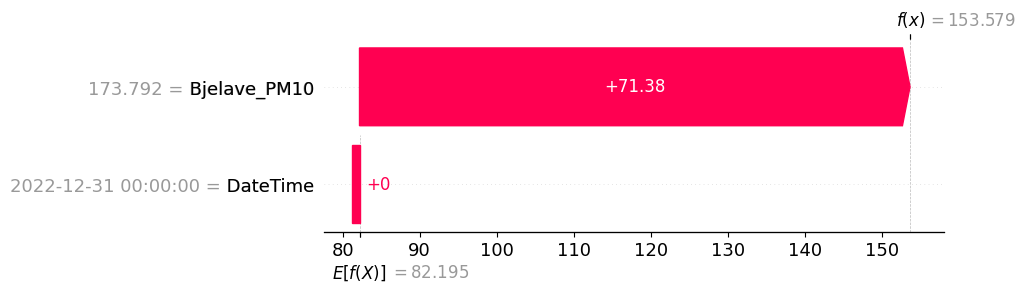

In [ ]:
shap.plots.waterfall(explainer_day_aqi_ws_ninety_mod[0], max_display=2)

In [ ]:
print("SHAP values: ")
print("shap_values_day_aqi_ws_ninety: ", shap_values_day_aqi_ws_ninety)
print("shap_values_day_aqi_ws_sixty: ", shap_values_day_aqi_ws_sixty)
print("shap_values_day_aqi_ws_thirty: ", shap_values_day_aqi_ws_thirty)

SHAP values: 
shap_values_day_aqi_ws_ninety:  [[ 0.         71.38313347]]
shap_values_day_aqi_ws_sixty:  [[ 0.         70.70351336]]
shap_values_day_aqi_ws_thirty:  [[ 0.         70.70351336]]


In [ ]:
import shap
explainer_day_combined_ws_thirty = shap.KernelExplainer(prophet_predict_ws_thirty_for_shap_combined, background_data_combined_ws_thirty)
shap_values_day_combined_ws_thirty = explainer_day_combined_ws_thirty.shap_values(day_combined_to_explain_ws_thirty)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
custom_feature_columns_combined = [col if col not in ['y', 'ds'] else ('Bjelave_PM10' if col == 'y' else 'DateTime') for col in feature_columns_combined]
custom_feature_columns_combined

['DateTime',
 'Bjelave_PM10',
 'wind_speed',
 'wind_direction',
 'precipitation',
 'pressure',
 'temperature',
 'humidity',
 'visibility',
 'cloudiness',
 'Bjelave_SO2',
 'Bjelave_NO2']

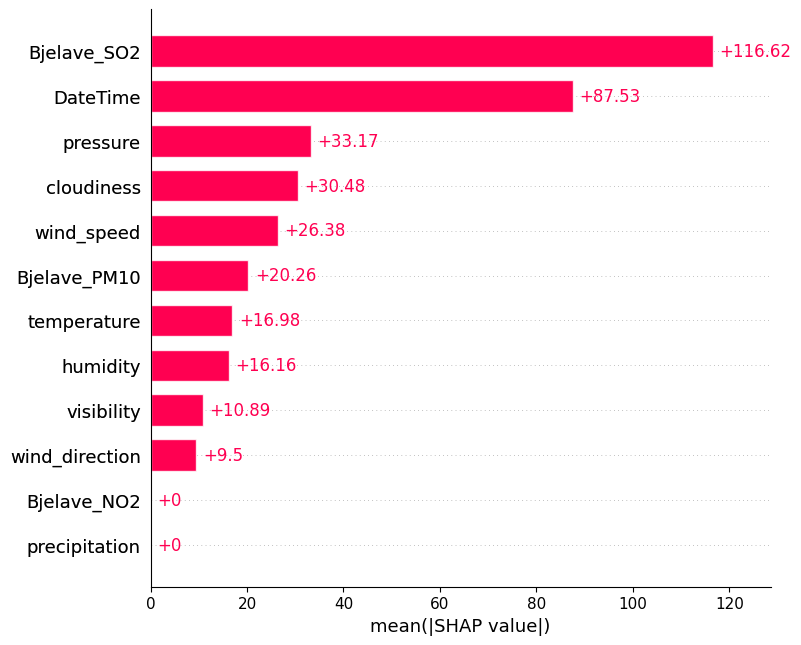

In [ ]:
explainer_day_combined_ws_thirty_mod = shap.Explanation(
    values=shap_values_day_combined_ws_thirty,
    base_values=np.array([explainer_day_combined_ws_thirty.expected_value] * len(shap_values_day_combined_ws_thirty)),
    data=day_combined_to_explain_ws_thirty,
    feature_names=custom_feature_columns_combined
)

shap.plots.bar(explainer_day_combined_ws_thirty_mod, max_display=len(custom_feature_columns_combined))


In [ ]:
explainer_day_combined_ws_thirty_mod.base_values

array([-20048.81342837])

In [ ]:
explainer_day_combined_ws_thirty.expected_value

-20048.81342836516

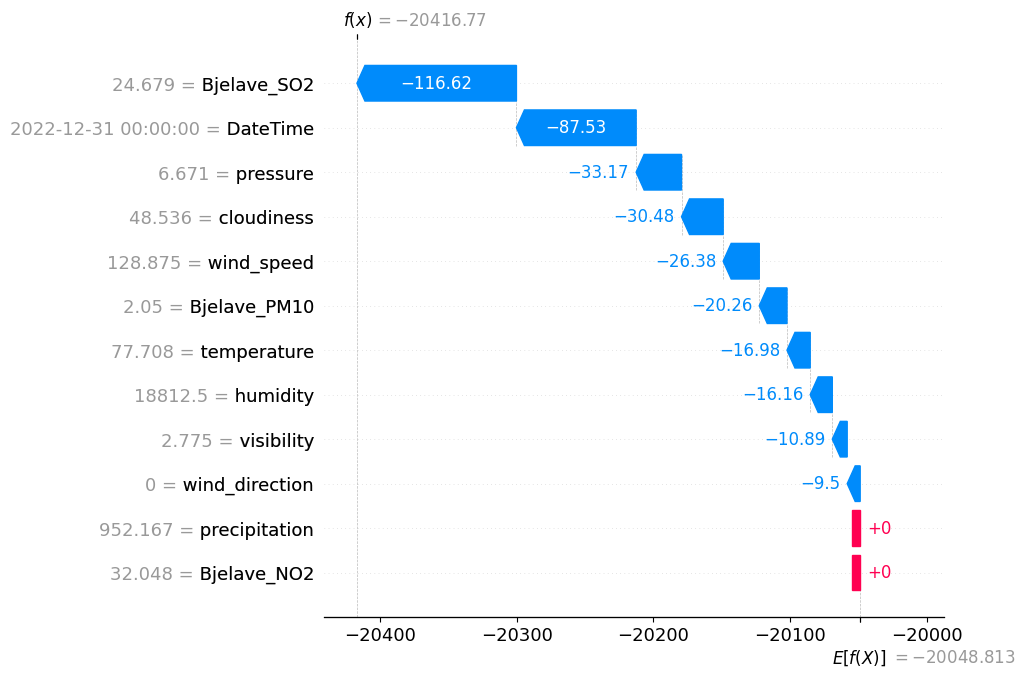

In [ ]:
shap.plots.waterfall(explainer_day_combined_ws_thirty_mod[0], max_display=len(custom_feature_columns_combined))

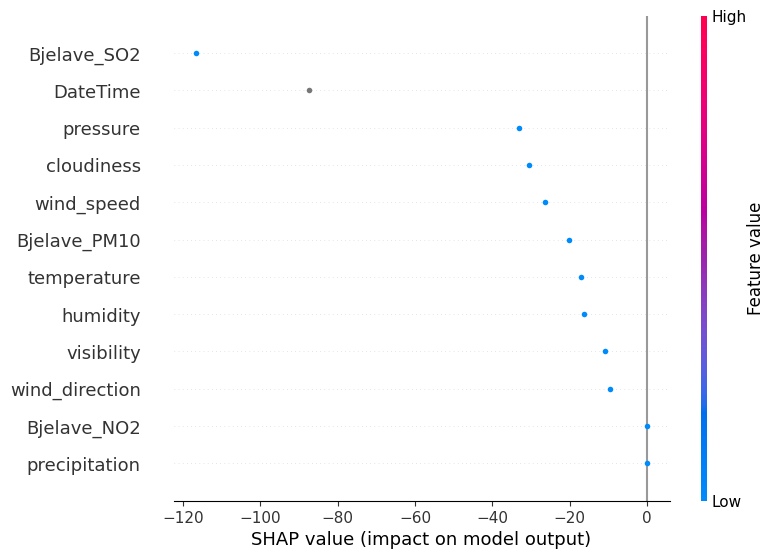

In [ ]:
shap.plots.beeswarm(explainer_day_combined_ws_thirty_mod, max_display=len(custom_feature_columns_combined))


# SHAP Analysis of Selected Forecast Horizons in Facebook Prophet Model

In [ ]:
custom_feature_names = [
    'Bjelave_PM10' if col == 'yhat' else
    'DateTime' if col == 'ds' else
    col
    for col in data_aqi_to_explain_ws_thirty.columns
]

In [ ]:
data_aqi_to_explain_ws_thirty.head(2)


ds        yhat
1654 2022-12-01  115.125000
1655 2022-12-02  130.916667

In [ ]:
import shap
explainer_data_aqi_ws_thirty = shap.KernelExplainer(prophet_predict_ws_thirty_for_shap, background_data_aqi_ws_thirty, feature_columns_aqi)
shap_values_data_aqi_ws_thirty = explainer_data_aqi_ws_thirty.shap_values(data_aqi_to_explain_ws_thirty)

  0%|          | 0/31 [00:00<?, ?it/s]

In [285]:
shap_values_data_aqi_ws_thirty

array([[ 0.        , 59.45966541],
       [ 0.        , 62.321061  ],
       [ 0.        , 61.40772078],
       [ 0.        , 59.82828736],
       [ 0.        , 59.52259625],
       [ 0.        , 59.26856798],
       [ 0.        , 62.59499018],
       [ 0.        , 64.10159613],
       [ 0.        , 65.30245438],
       [ 0.        , 62.78606861],
       [ 0.        , 59.70122887],
       [ 0.        , 58.02594197],
       [ 0.        , 56.57335999],
       [ 0.        , 58.90366173],
       [ 0.        , 59.64331632],
       [ 0.        , 60.32776429],
       [ 0.        , 57.56093311],
       [ 0.        , 54.50064369],
       [ 0.        , 53.12724739],
       [ 0.        , 52.24942044],
       [ 0.        , 55.41607502],
       [ 0.        , 57.23581643],
       [ 0.        , 59.21997772],
       [ 0.        , 57.94264131],
       [ 0.        , 56.52669246],
       [ 0.        , 56.91322915],
       [ 0.        , 57.86823719],
       [ 0.        , 62.89546928],
       [ 0.        ,

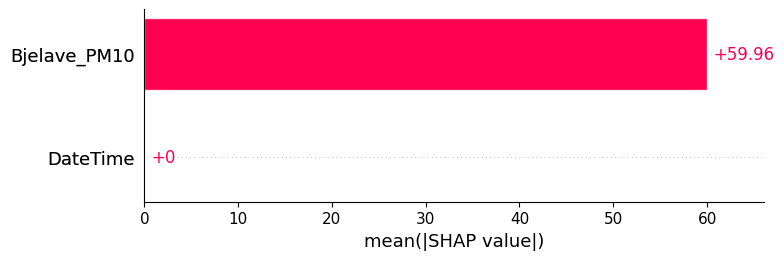

In [ ]:
explainer_data_aqi_ws_thirty_mod = shap.Explanation(
    values=shap_values_data_aqi_ws_thirty,
    base_values=np.array([explainer_data_aqi_ws_thirty.expected_value] * len(shap_values_data_aqi_ws_thirty)),
    data=data_aqi_to_explain_ws_thirty,
    feature_names=custom_feature_names
)

shap.plots.bar(explainer_data_aqi_ws_thirty_mod, max_display=len(custom_feature_names))

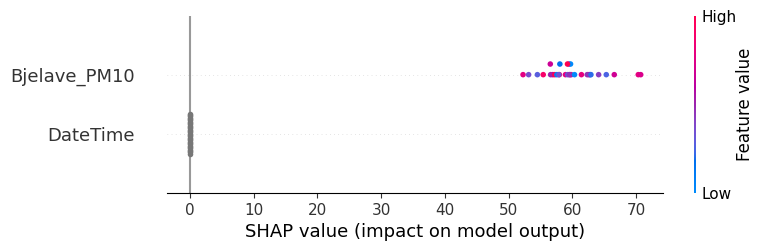

In [ ]:
shap.plots.beeswarm(explainer_data_aqi_ws_thirty_mod)

In [ ]:
explainer_data_aqi_ws_sixty = shap.KernelExplainer(prophet_predict_ws_sixty_for_shap, background_data_aqi_ws_sixty, feature_columns_aqi)
shap_values_data_aqi_ws_sixty = explainer_data_aqi_ws_sixty.shap_values(data_aqi_to_explain_ws_sixty)

  0%|          | 0/61 [00:00<?, ?it/s]

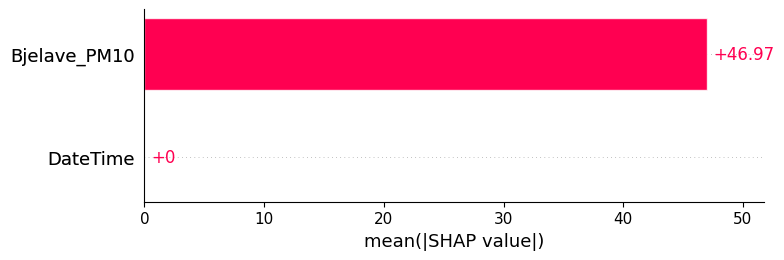

In [ ]:
explainer_data_aqi_ws_sixty_mod = shap.Explanation(
    values=shap_values_data_aqi_ws_sixty,
    base_values=np.array([explainer_data_aqi_ws_thirty.expected_value] * len(shap_values_data_aqi_ws_thirty)),
    data=data_aqi_to_explain_ws_sixty,
    feature_names=custom_feature_names
)

shap.plots.bar(explainer_data_aqi_ws_sixty_mod, max_display=len(custom_feature_names))

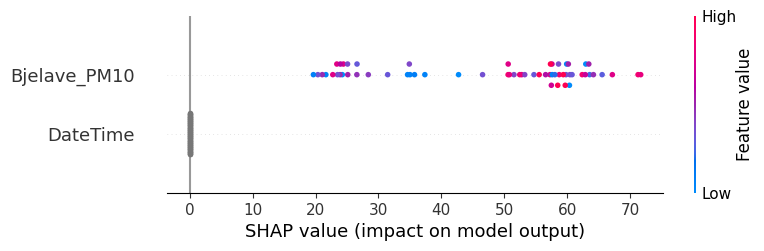

In [ ]:
shap.plots.beeswarm(explainer_data_aqi_ws_sixty_mod)

In [ ]:
explainer_data_aqi_ws_ninety = shap.KernelExplainer(prophet_predict_ws_ninety_for_shap, background_data_aqi_ws_ninety, feature_columns_aqi)
shap_values_data_aqi_ws_ninety = explainer_data_aqi_ws_ninety.shap_values(data_aqi_to_explain_ws_ninety)

  0%|          | 0/91 [00:00<?, ?it/s]

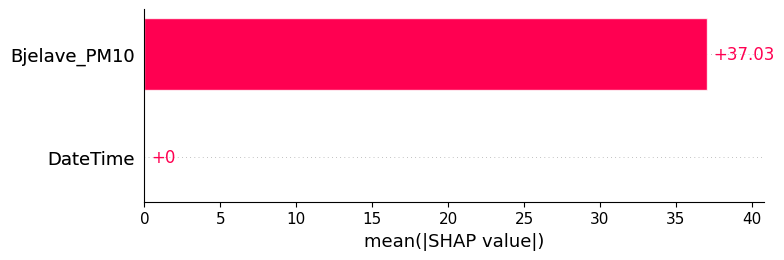

In [ ]:
explainer_data_aqi_ws_ninety_mod = shap.Explanation(
    values=shap_values_data_aqi_ws_ninety,
    base_values=np.array([explainer_data_aqi_ws_ninety.expected_value] * len(shap_values_data_aqi_ws_ninety)),
    data=data_aqi_to_explain_ws_ninety,
    feature_names=custom_feature_names
)

shap.plots.bar(explainer_data_aqi_ws_ninety_mod, max_display=len(custom_feature_names))

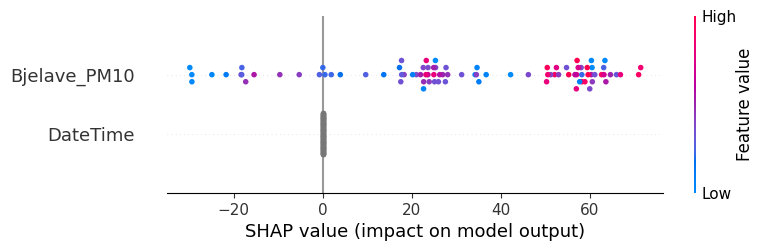

In [ ]:
shap.plots.beeswarm(explainer_data_aqi_ws_ninety_mod)

In [ ]:
data_combined_to_explain_ws_thirty.columns

Index(['ds', 'wind_speed', 'wind_direction', 'precipitation', 'pressure',
       'temperature', 'humidity', 'visibility', 'cloudiness', 'yhat',
       'Bjelave_SO2', 'Bjelave_NO2'],
      dtype='object')

In [ ]:
background_data_combined_ws_thirty.columns

Index(['ds', 'wind_speed', 'wind_direction', 'precipitation', 'pressure',
       'temperature', 'humidity', 'visibility', 'cloudiness', 'y',
       'Bjelave_SO2', 'Bjelave_NO2'],
      dtype='object')

In [ ]:
custom_feature_names = [
    'Bjelave_PM10' if col == 'yhat' else
    'DateTime' if col == 'ds' else
    col
    for col in data_combined_to_explain_ws_thirty.columns
]

In [ ]:
custom_feature_names

['DateTime',
 'wind_speed',
 'wind_direction',
 'precipitation',
 'pressure',
 'temperature',
 'humidity',
 'visibility',
 'cloudiness',
 'Bjelave_PM10',
 'Bjelave_SO2',
 'Bjelave_NO2']

In [ ]:
explainer_data_combined_ws_thirty = shap.KernelExplainer(prophet_predict_ws_thirty_for_shap_combined, background_data_combined_ws_thirty)
shap_values_data_combined_ws_thirty = explainer_data_combined_ws_thirty.shap_values(data_combined_to_explain_ws_thirty)

  0%|          | 0/31 [00:00<?, ?it/s]

In [286]:
shap_values_data_combined_ws_thirty

array([[ 391.42175401,  397.8316341 ,  312.57070727,  384.2687195 ,
         327.63146816,  363.64117893,  287.36120785,  439.56811924,
         306.64831546,    0.        ,    0.        ,  275.55307442],
       [ 347.2589997 ,  322.51467546,  371.64251017,  379.63568304,
         340.31818528,    0.        ,  300.64388468,  345.6217997 ,
         332.96697011,  349.55683128,  286.65814635,    0.        ],
       [ 256.72343518,    0.        ,  261.30415293,  236.67010189,
         278.93646245,    0.        ,  209.63621478,  308.15097891,
         255.75185747,  344.34391408,  204.85502097,  238.62300028],
       [ -63.99960271,    0.        ,   -8.19827906,  -19.55107941,
         -22.44762892,  -39.92293441,  -13.22003405,   -3.67003306,
         -11.33564608,  -29.15215644,  -70.94250937,    0.        ],
       [ -84.63149283, -124.12998952,    0.        ,  -74.11672806,
         -62.49759353,  -57.40420884,  -70.97504828,  -75.6047005 ,
         -85.09760175, -107.6216301 ,  -85.5

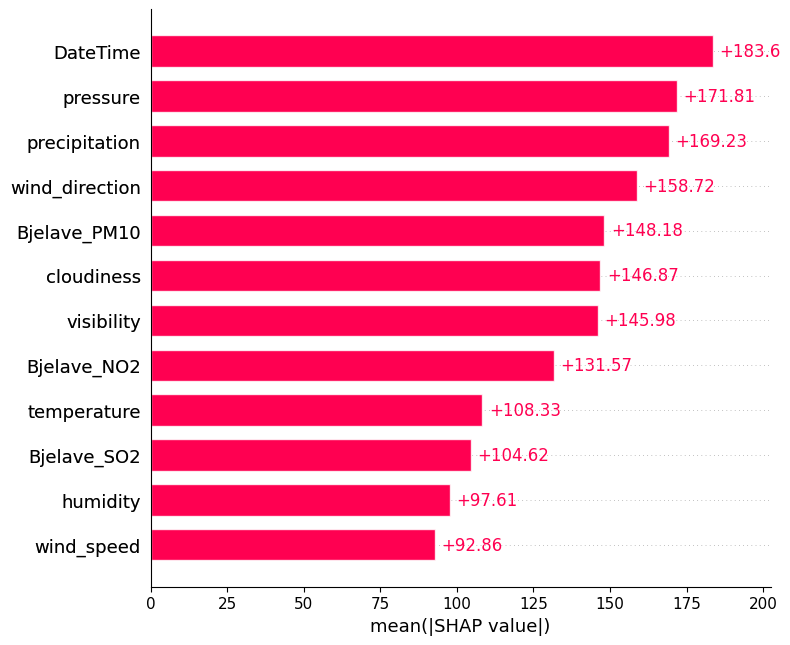

In [ ]:
explainer_data_combined_ws_thirty_mod = shap.Explanation(
    values=shap_values_data_combined_ws_thirty,
    base_values=np.array([explainer_data_combined_ws_thirty.expected_value] * len(shap_values_data_combined_ws_thirty)),
    data=data_combined_to_explain_ws_thirty,
    feature_names=custom_feature_names
)
shap.plots.bar(explainer_data_combined_ws_thirty_mod, max_display=len(custom_feature_names))

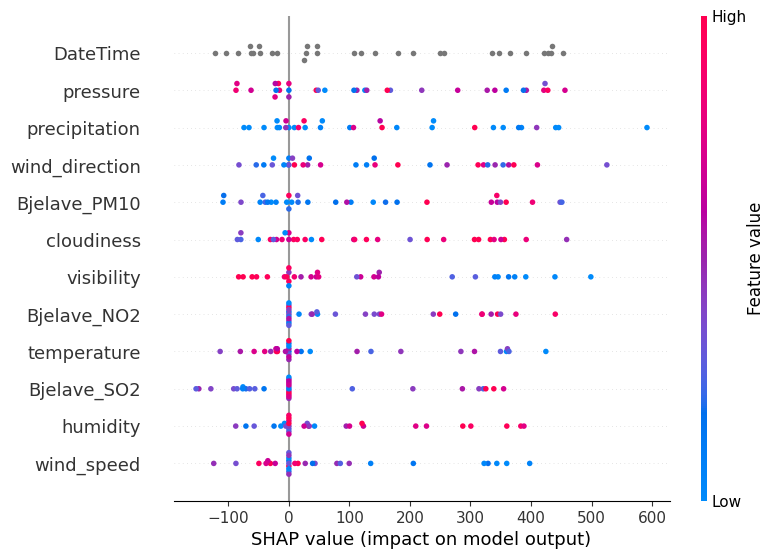

In [ ]:
shap.plots.beeswarm(explainer_data_combined_ws_thirty_mod, max_display=len(custom_feature_names))

/usr/local/lib/python3.11/dist-packages/shap/plots/_violin.py:304: UserWarning: Not enough data in bin #1 for feature wind_speed, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/shap/plots/_violin.py:304: UserWarning: Not enough data in bin #3 for feature wind_speed, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/shap/plots/_violin.py:304: UserWarning: Not enough data in bin #5 for feature wind_speed, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/shap/plots/_violin.py:304: UserWarning: Not enough data in bin #7 for feature wind_speed, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/shap/plots/_violin.py:304: UserWarning: Not enough data in bin #10 for feature wind_speed, so it'll be i

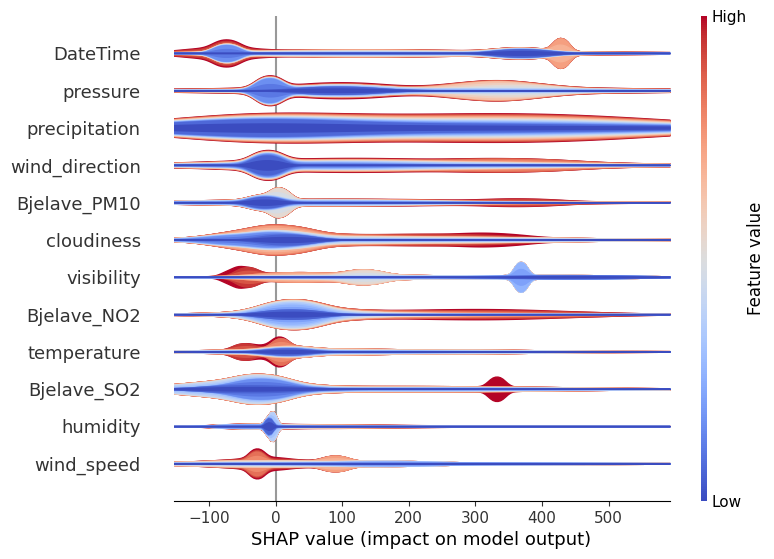

In [222]:
shap.plots.violin(shap_values_data_combined_ws_thirty, features=test_data_combined_ws_thirty, feature_names=custom_feature_names, plot_type="layered_violin")


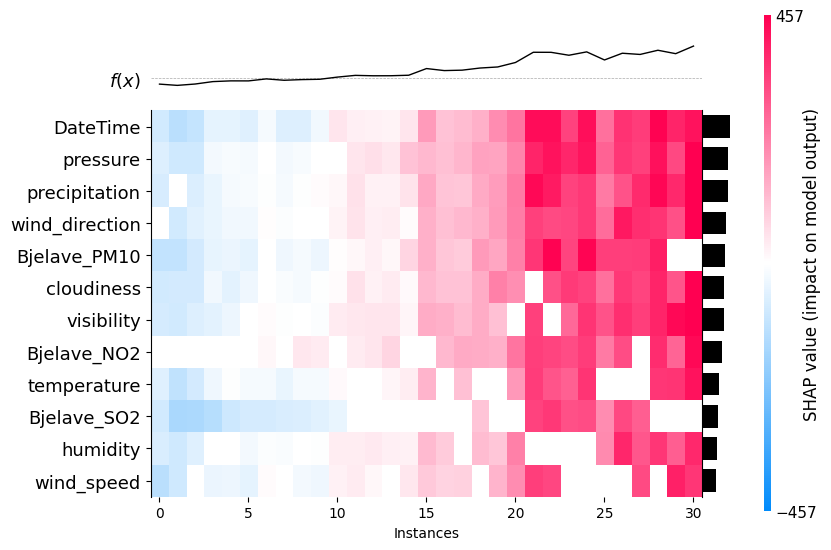

<Axes: xlabel='Instances'>

In [ ]:
shap.plots.heatmap(explainer_data_combined_ws_thirty_mod, max_display=len(custom_feature_names))


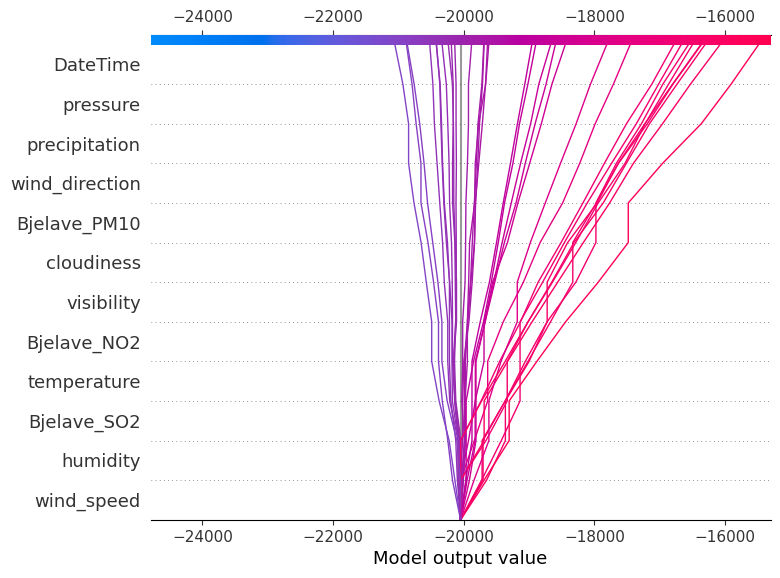

In [ ]:
shap.decision_plot(explainer_data_combined_ws_thirty.expected_value, shap_values_data_combined_ws_thirty, custom_feature_names)


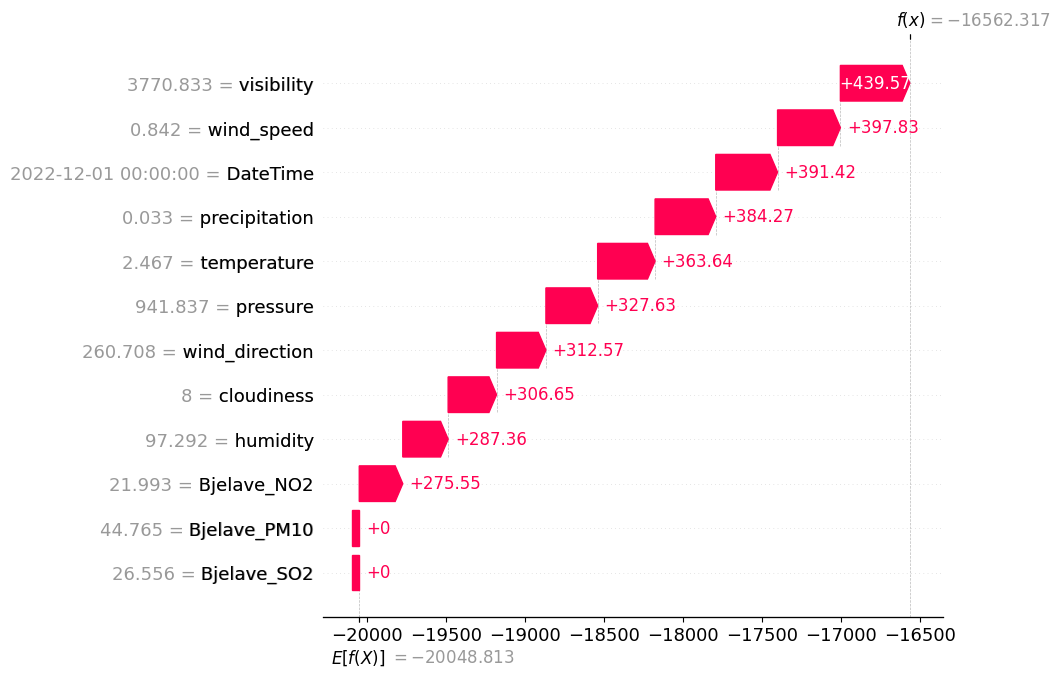

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_thirty_mod[0], max_display=len(custom_feature_names))

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_thirty_mod[10], max_display=len(custom_feature_names))

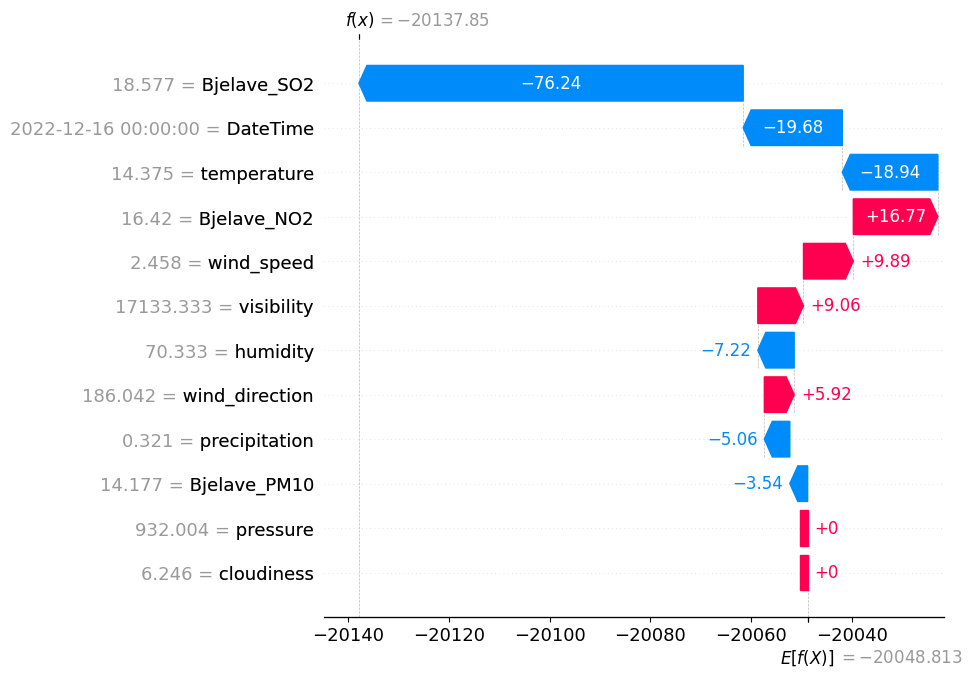

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_thirty_mod[15], max_display=len(custom_feature_names))

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_thirty_mod[20], max_display=len(custom_feature_names))

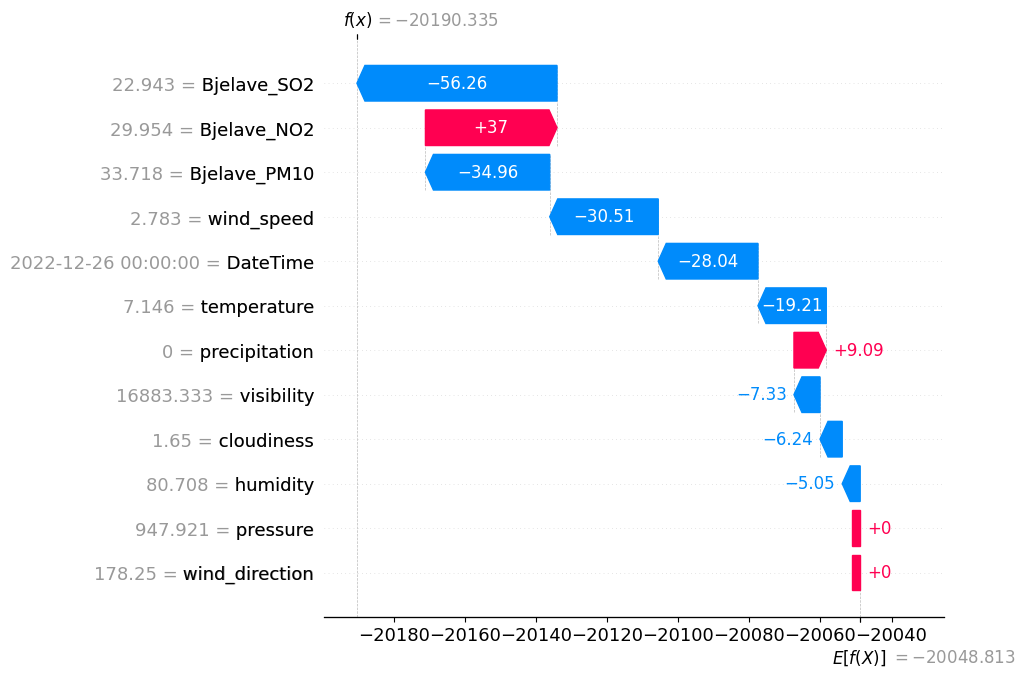

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_thirty_mod[25], max_display=len(custom_feature_names))

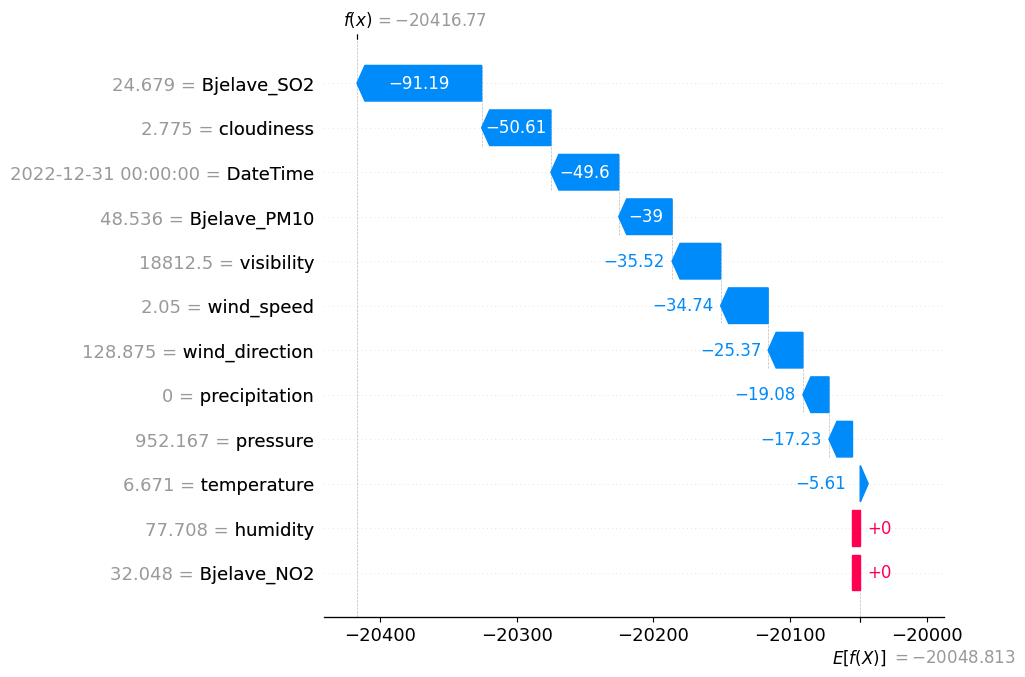

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_thirty_mod[30], max_display=len(custom_feature_names))

In [ ]:
explainer_data_combined_ws_sixty = shap.KernelExplainer(prophet_predict_ws_sixty_for_shap_combined, background_data_combined_ws_sixty)
shap_values_data_combined_ws_sixty = explainer_data_combined_ws_sixty.shap_values(data_combined_to_explain_ws_sixty)

  0%|          | 0/61 [00:00<?, ?it/s]

In [287]:
shap_values_data_combined_ws_sixty

array([[-111.74662818, -118.32029765,  -84.4023362 ,  -87.28493186,
         -74.03460054,  -77.02482374,    0.        ,  -51.74433893,
         -82.1329342 , -101.66626263,  -64.92230263,    0.        ],
       [ -96.22476178,  -60.82763143,  -54.81921581,  -54.28864943,
         -57.99926694,  -63.37843113,    0.        ,  -87.21098426,
         -64.82313342,  -71.41531415,  -34.85808509,    0.        ],
       [-113.44051741,  -90.30699793,  -73.66287486,  -78.38203069,
         -66.62632536,  -78.75888598,    0.        ,  -73.1045927 ,
        -102.229547  ,  -60.72105679,    0.        ,  -46.12506167],
       [ -51.31827616,  -71.65576375,  -33.41444036,  -42.52889594,
         -33.35044211,  -59.11091927,   42.10748501,  -67.13160979,
           0.        ,  -91.45156038,  -26.21101999,    0.        ],
       [ 341.2344645 ,    0.        ,  235.04887975,  332.57017998,
         302.24585449,  234.24352498,  229.49375878,  303.79200232,
         265.46521725,  348.78495314,  332.1

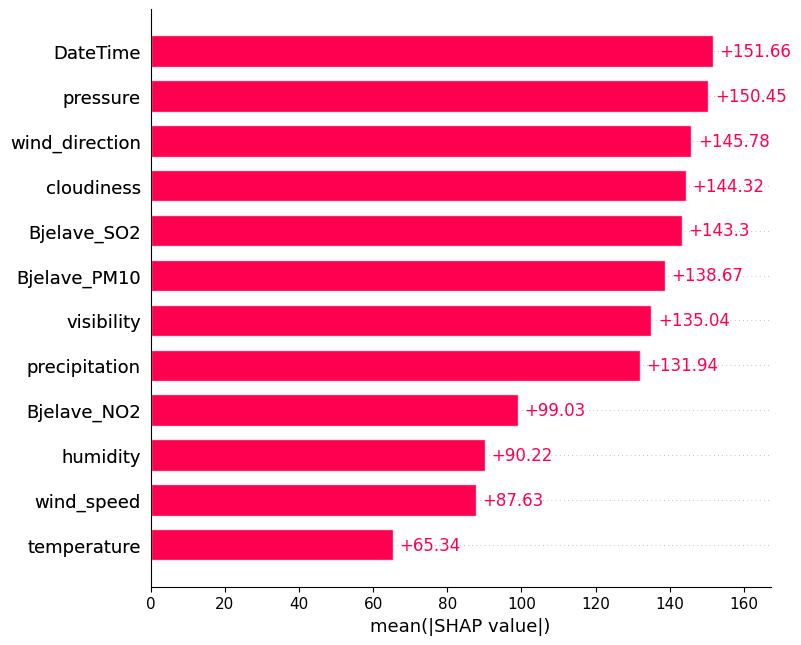

In [ ]:
explainer_data_combined_ws_sixty_mod = shap.Explanation(
    values=shap_values_data_combined_ws_sixty,
    base_values=np.array([explainer_data_combined_ws_sixty.expected_value] * len(shap_values_data_combined_ws_sixty)),
    data=data_combined_to_explain_ws_sixty,
    feature_names=custom_feature_names
)
shap.plots.bar(explainer_data_combined_ws_sixty_mod, max_display=len(custom_feature_names))

In [192]:
shap.summary_plot(shap_values_data_combined_ws_sixty, test_data_combined_ws_sixty)

In [200]:
shap_values_data_combined_ws_sixty_noDT = shap_values_data_combined_ws_sixty[1:]
test_data_combined_ws_sixty_noDT = test_data_combined_ws_sixty[1:]

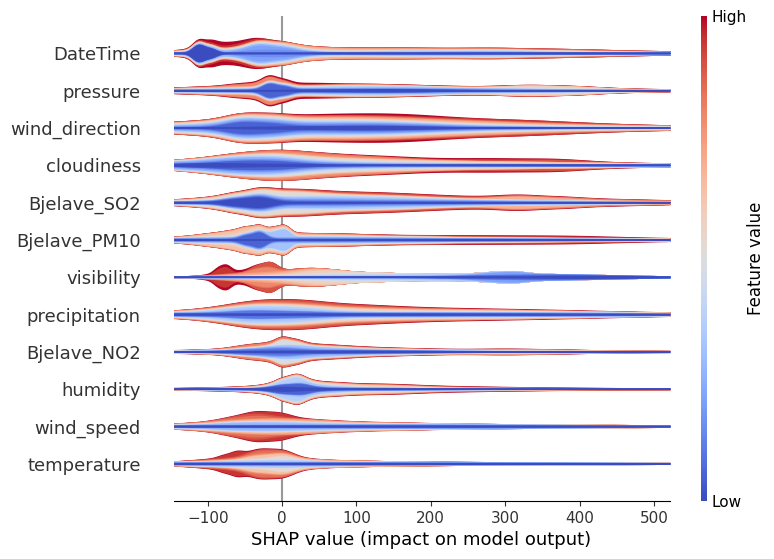

In [223]:
shap.plots.violin(shap_values_data_combined_ws_sixty, features=test_data_combined_ws_sixty, feature_names=custom_feature_names, plot_type="layered_violin")


In [211]:
test_data_combined_ws_ninety.iloc[7]


ds                2022-10-09 00:00:00
wind_speed                   1.704167
wind_direction             164.958333
precipitation                     0.0
pressure                   948.579167
temperature                   13.1375
humidity                    75.166667
visibility                    15000.0
cloudiness                   5.429167
y                           37.622645
Bjelave_SO2                   13.8136
Bjelave_NO2                 10.543814
Name: 1742, dtype: object

In [ ]:
shap.plots.beeswarm(explainer_data_combined_ws_sixty_mod, max_display=len(custom_feature_names))

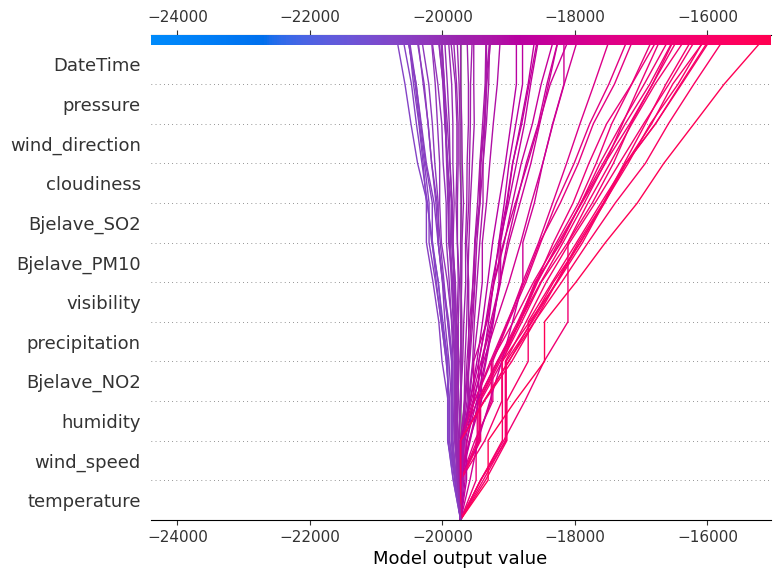

In [ ]:
shap.decision_plot(explainer_data_combined_ws_sixty.expected_value, shap_values_data_combined_ws_sixty, custom_feature_names)


In [ ]:
shap.plots.heatmap(explainer_data_combined_ws_sixty_mod, max_display=len(custom_feature_names))

<Axes: xlabel='Instances'>

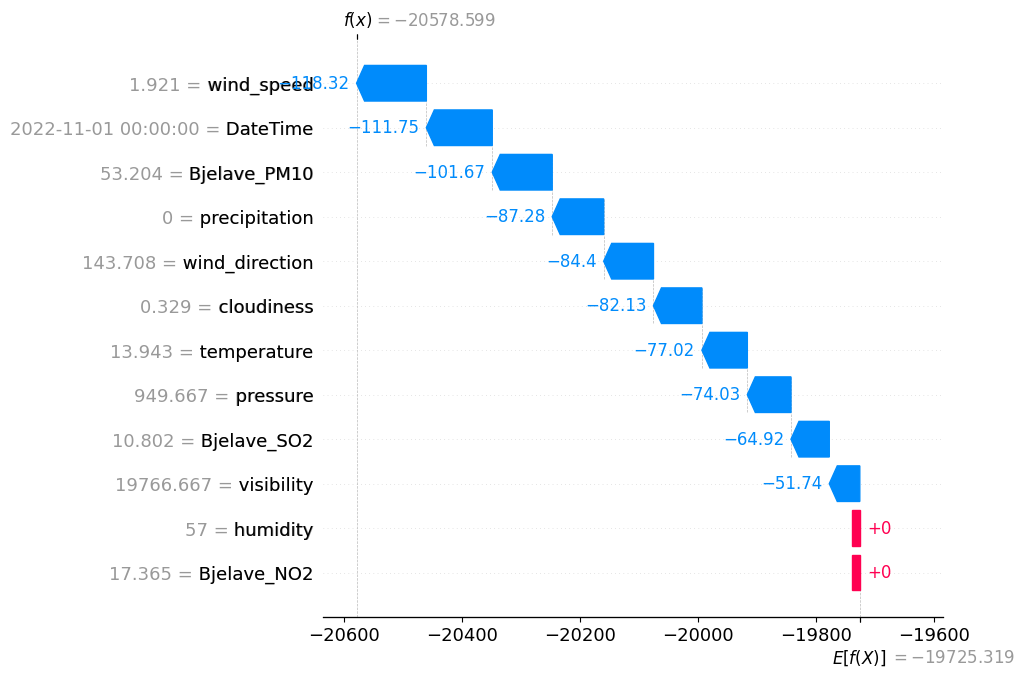

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_sixty_mod[0], max_display=len(custom_feature_names))

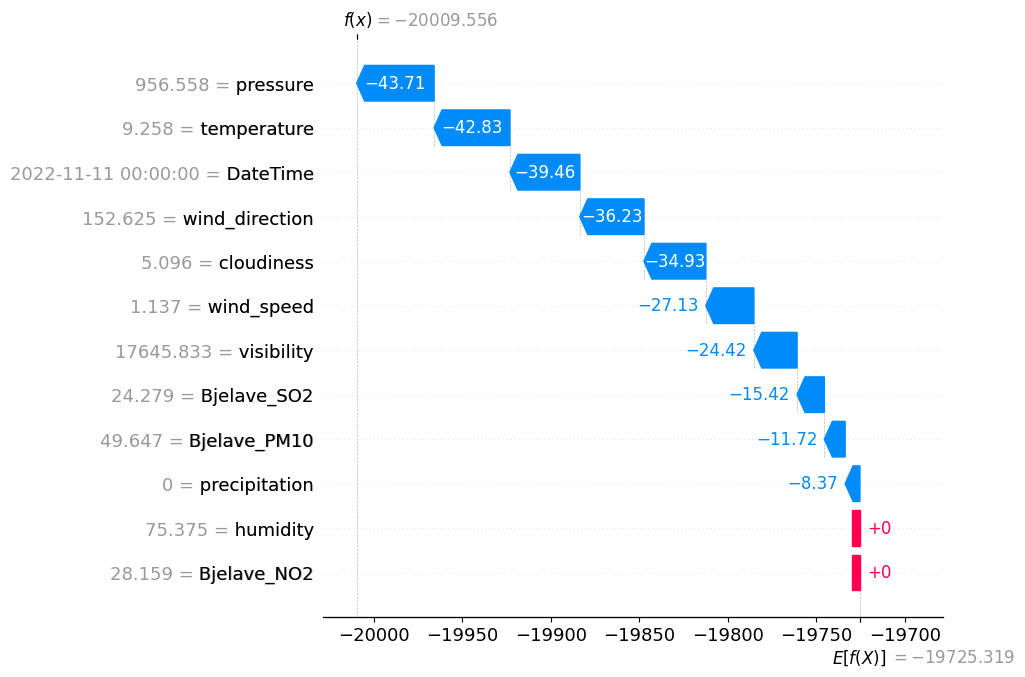

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_sixty_mod[10], max_display=len(custom_feature_names))

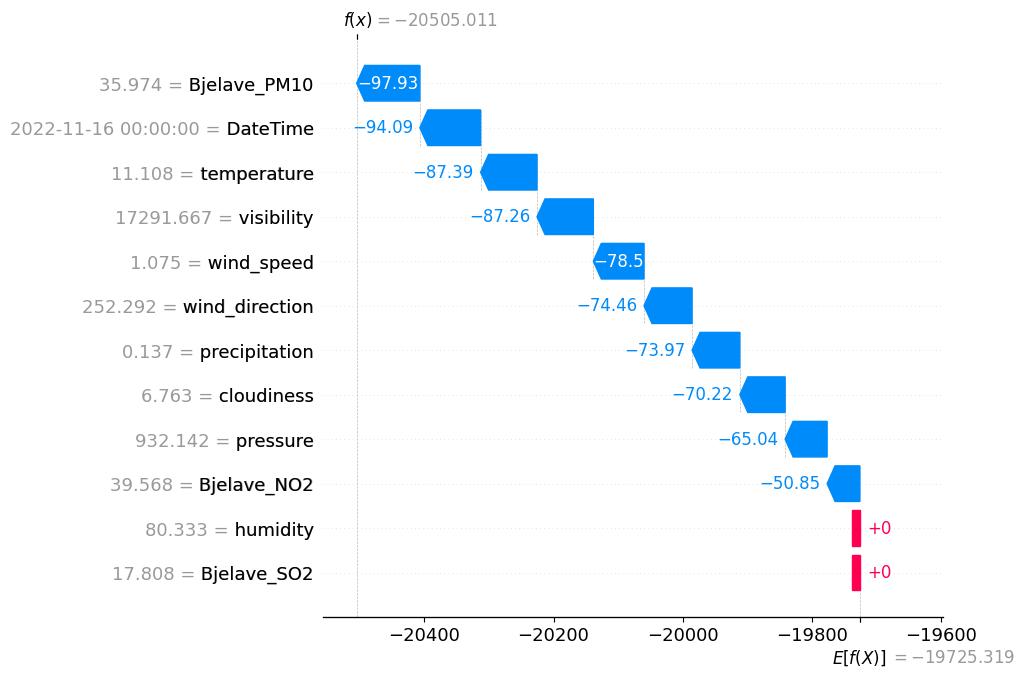

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_sixty_mod[15], max_display=len(custom_feature_names))

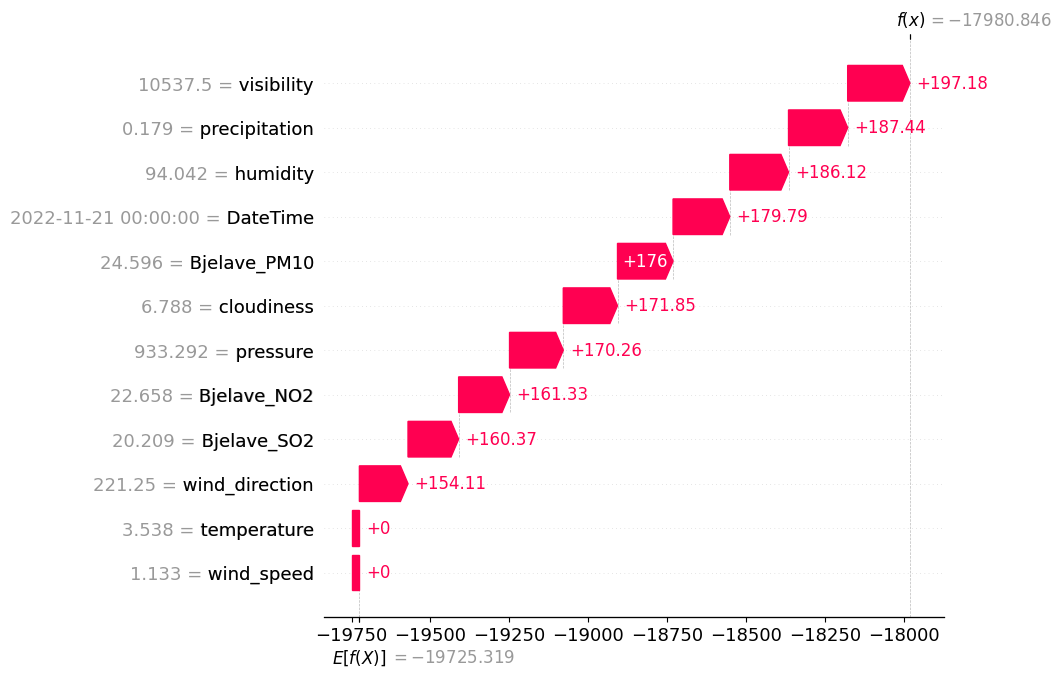

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_sixty_mod[20], max_display=len(custom_feature_names))

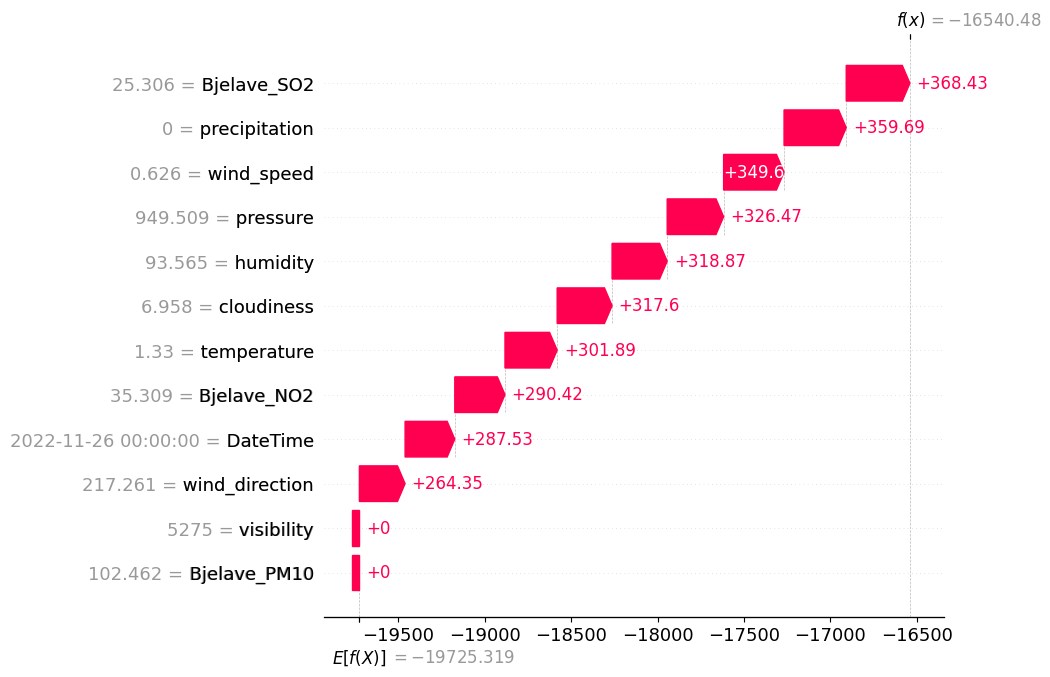

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_sixty_mod[25], max_display=len(custom_feature_names))

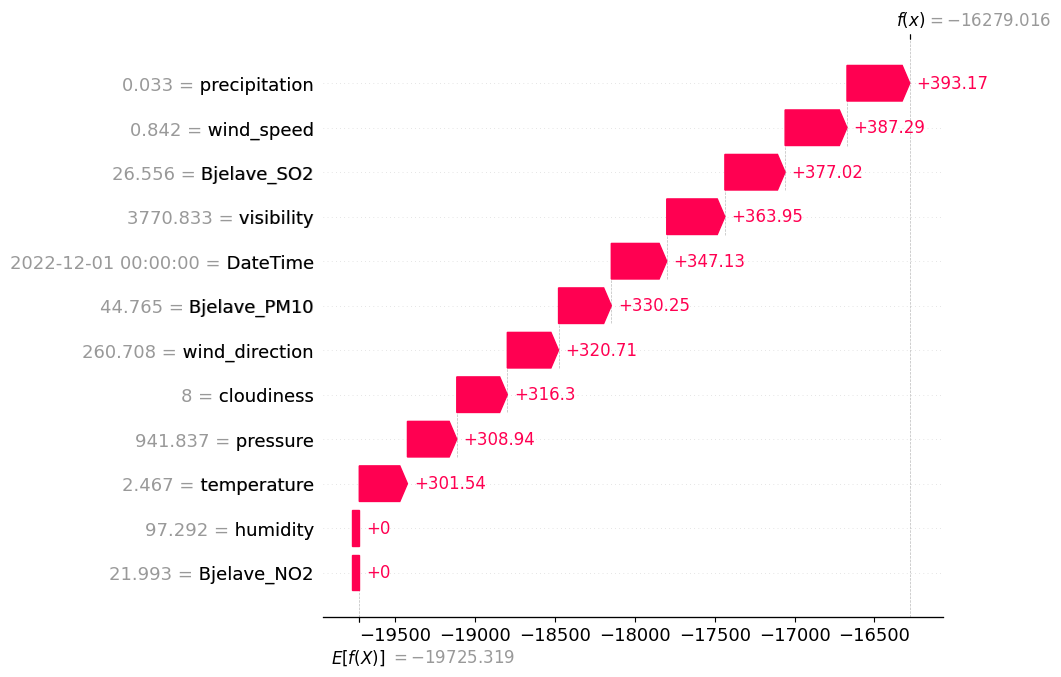

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_sixty_mod[30], max_display=len(custom_feature_names))

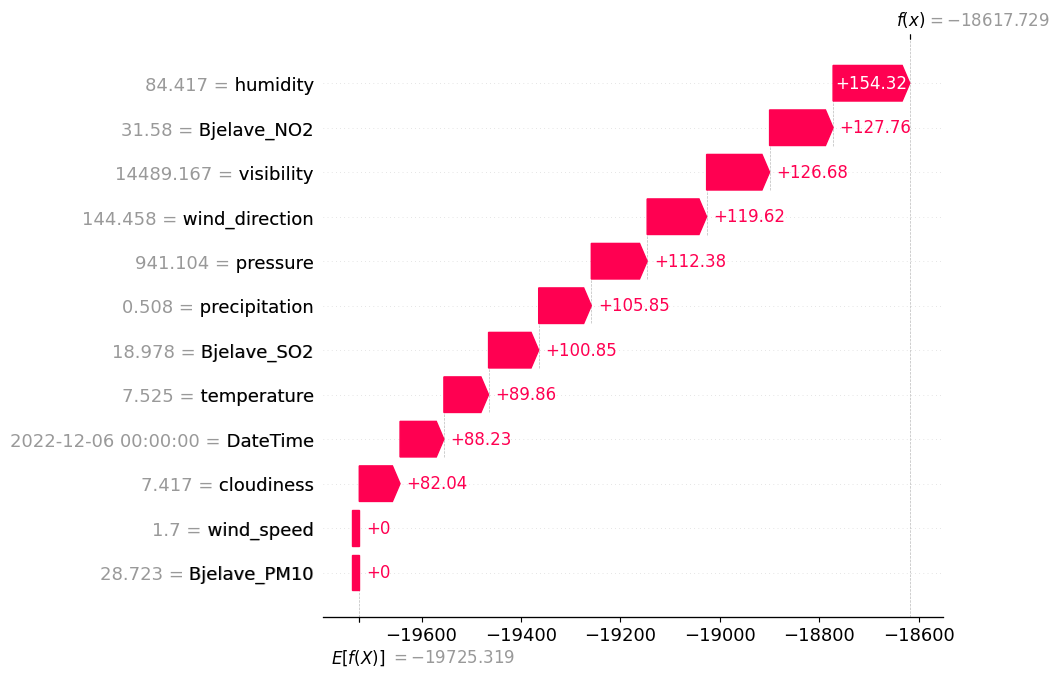

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_sixty_mod[35], max_display=len(custom_feature_names))

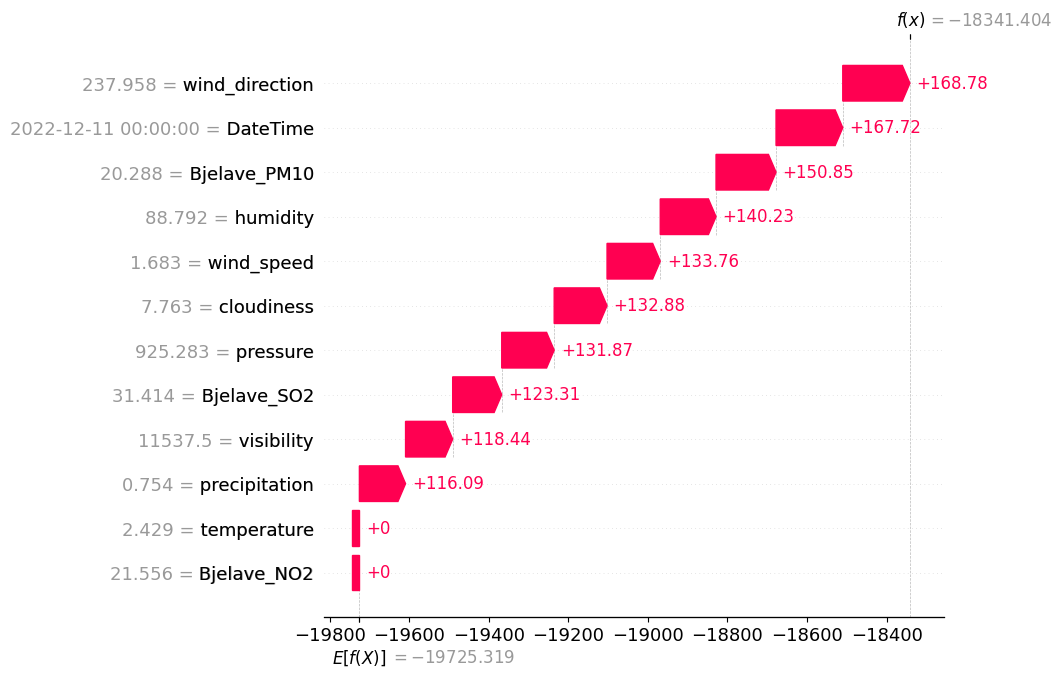

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_sixty_mod[40], max_display=len(custom_feature_names))

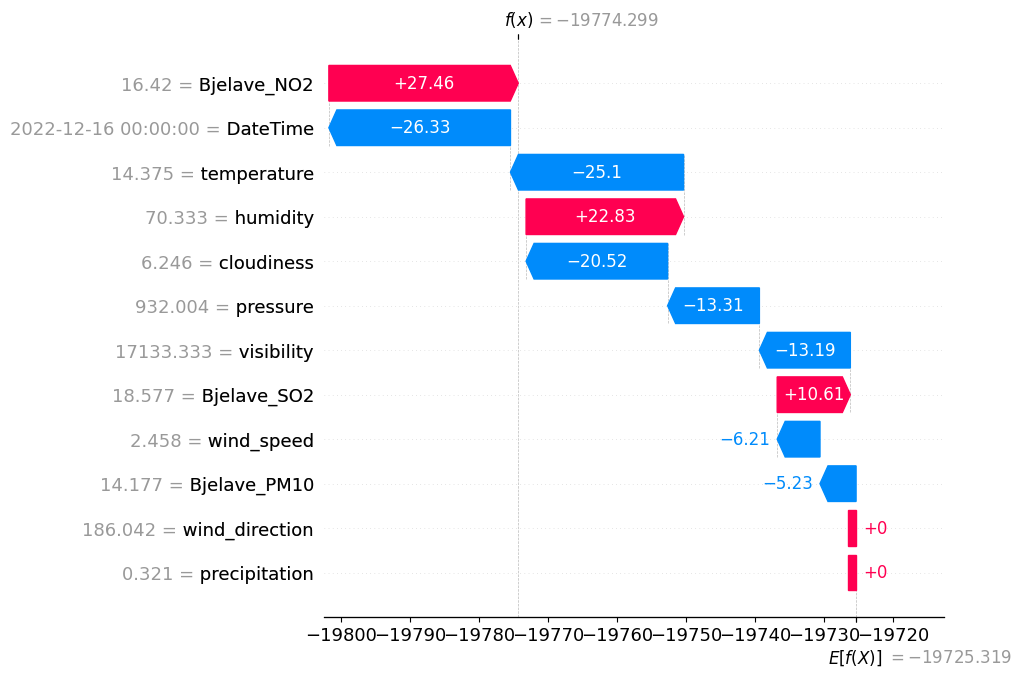

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_sixty_mod[45], max_display=len(custom_feature_names))

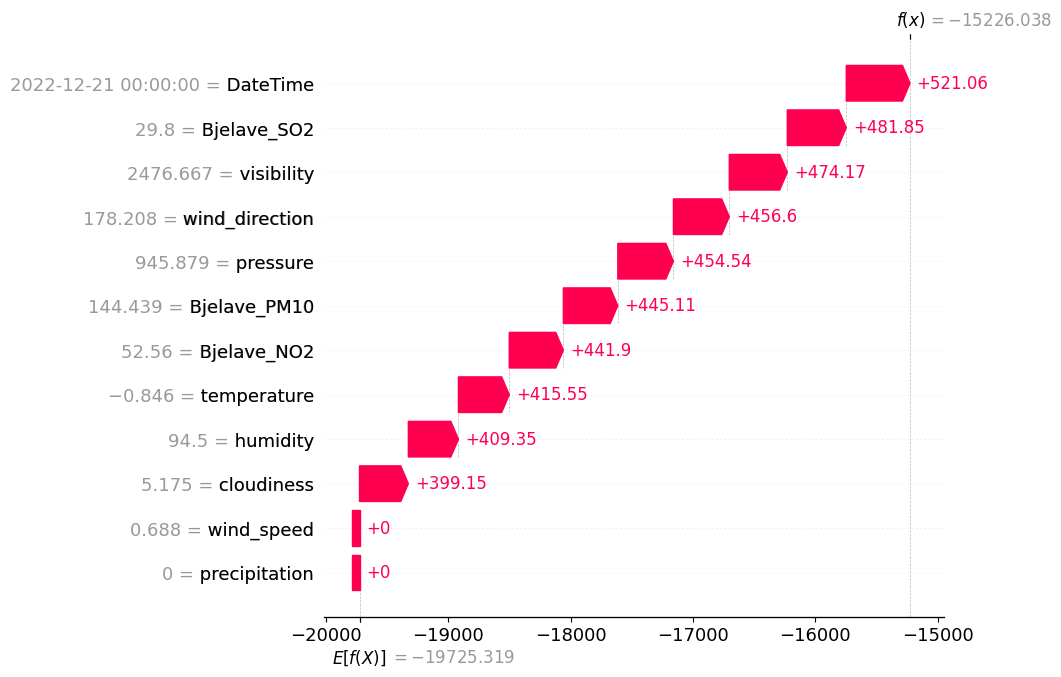

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_sixty_mod[50], max_display=len(custom_feature_names))

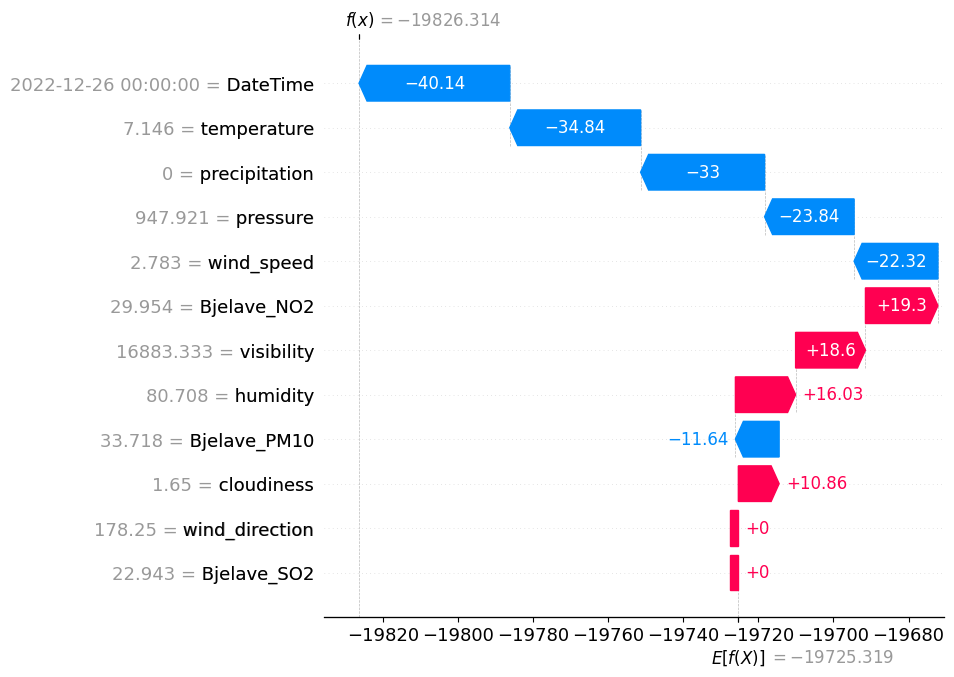

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_sixty_mod[55], max_display=len(custom_feature_names))

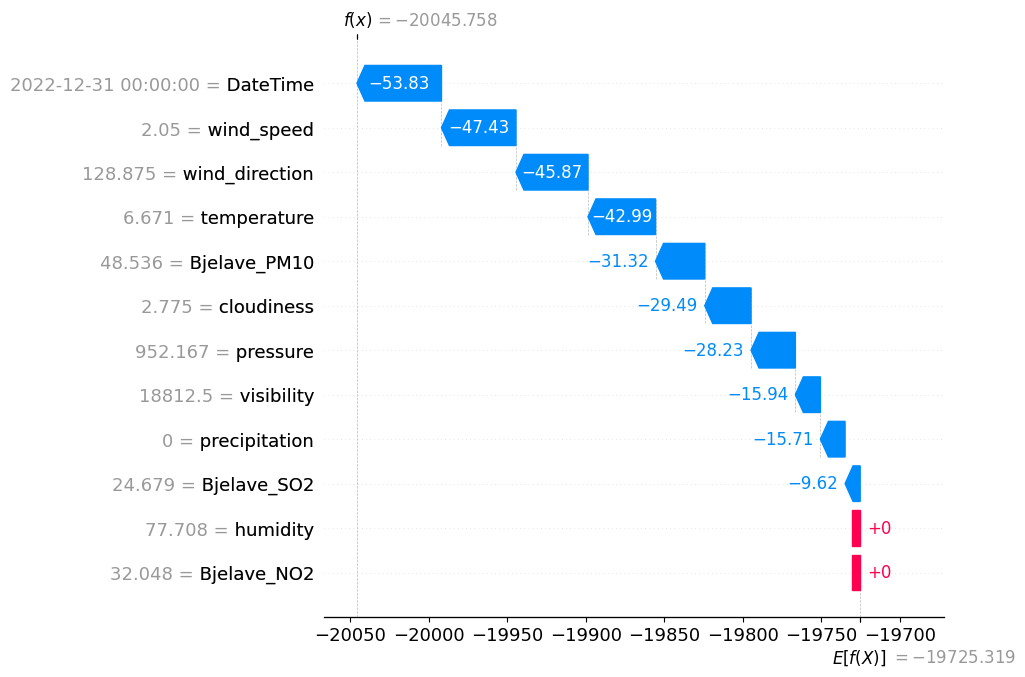

In [ ]:
shap.plots.waterfall(explainer_data_combined_ws_sixty_mod[60], max_display=len(custom_feature_names))

In [265]:
custom_feature_names_trimmed = custom_feature_names[1:]
custom_feature_names_trimmed[0]

'wind_speed'

In [266]:
#explainer_data_combined_ws_ninety = shap.KernelExplainer(prophet_predict_ws_ninety_for_shap_combined, background_data_combined_ws_ninety)
#shap_values_data_combined_ws_ninety = explainer_data_combined_ws_ninety.shap_values(data_combined_to_explain_ws_ninety)

In [267]:
#explainer_data_combined_ws_ninety_mod = shap.Explanation(
#    values=shap_values_data_combined_ws_ninety,
#    base_values=np.array([explainer_data_combined_ws_ninety.expected_value] * len(shap_values_data_combined_ws_ninety)),
#    data=data_combined_to_explain_ws_ninety,
#    feature_names=custom_feature_names
#)
#shap.plots.bar(explainer_data_combined_ws_ninety_mod, max_display=len(custom_feature_names))

# Dependence Plots for Window Size 60 (FB Prophet Model)

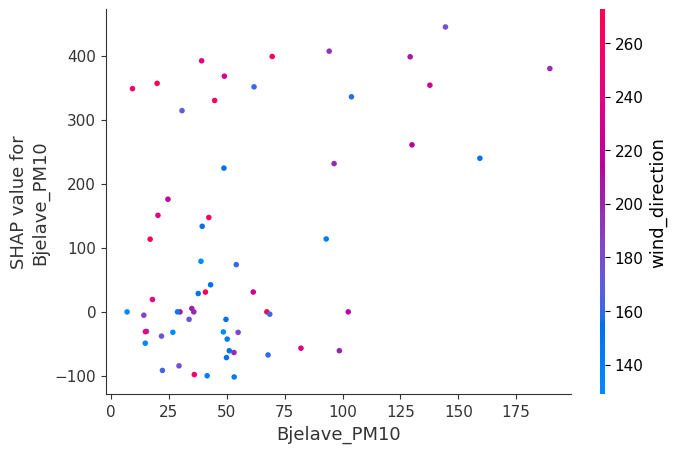

In [226]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=1
)

In [227]:
shap.dependence_plot(
    ind=1,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

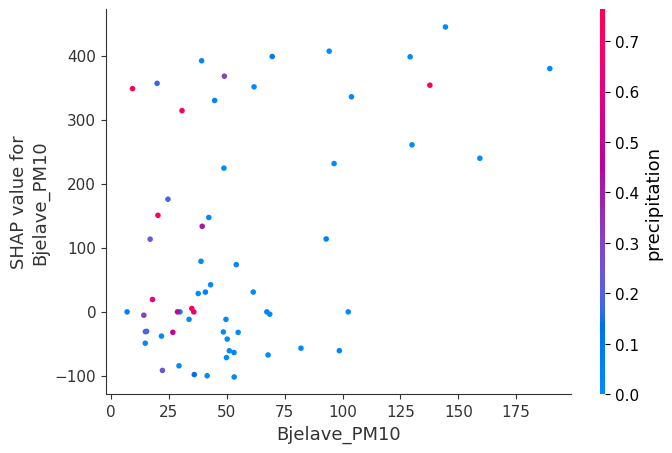

In [228]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=2
)

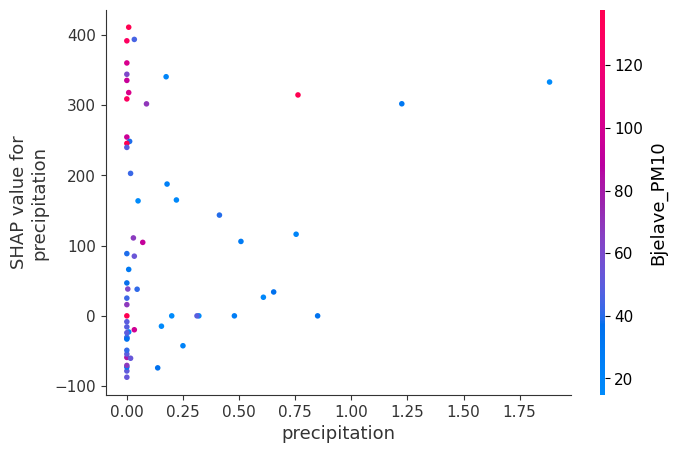

In [229]:
shap.dependence_plot(
    ind=2,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

In [230]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=3
)

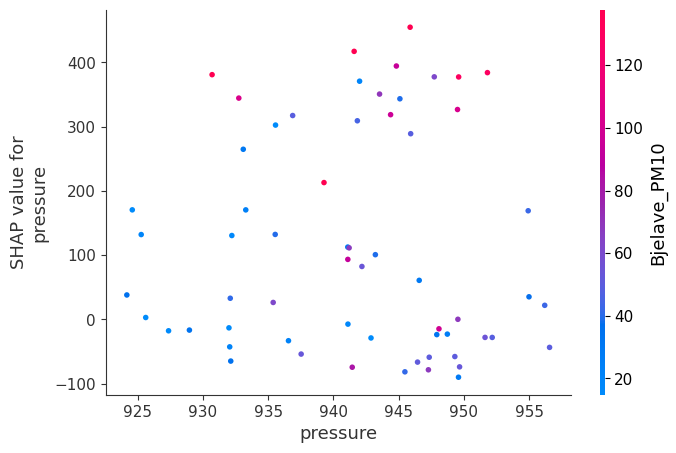

In [231]:
shap.dependence_plot(
    ind=3,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

In [232]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=4
)

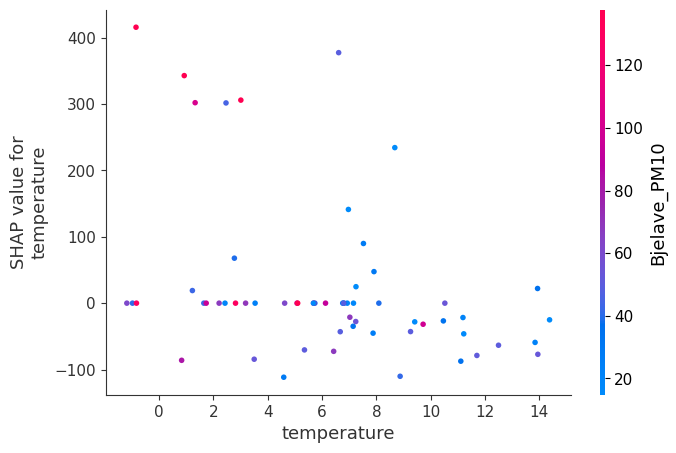

In [233]:
shap.dependence_plot(
    ind=4,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

In [234]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=5
)

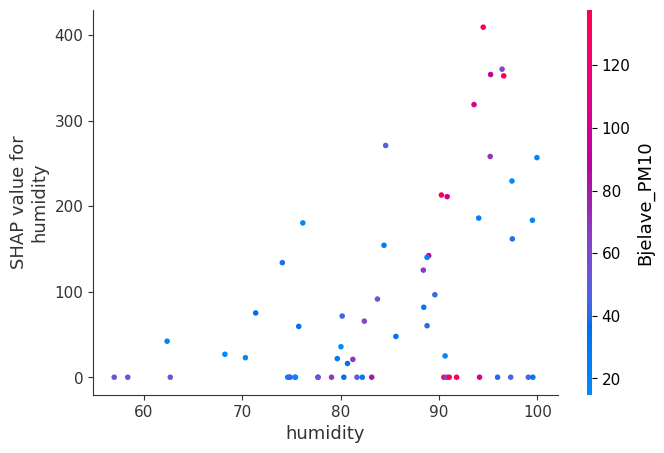

In [235]:
shap.dependence_plot(
    ind=5,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

In [236]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=6
)

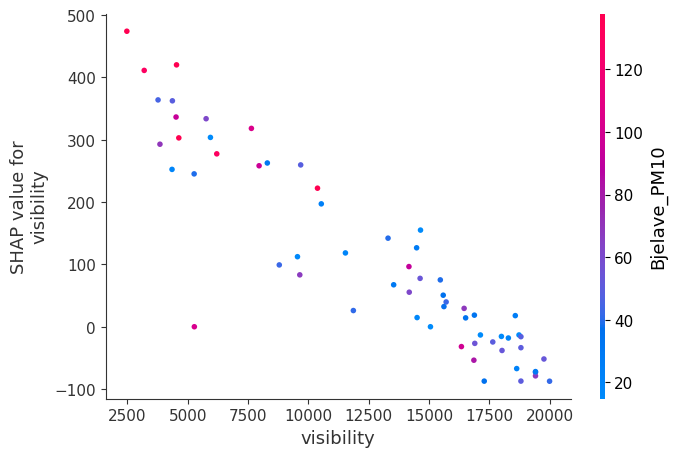

In [237]:
shap.dependence_plot(
    ind=6,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

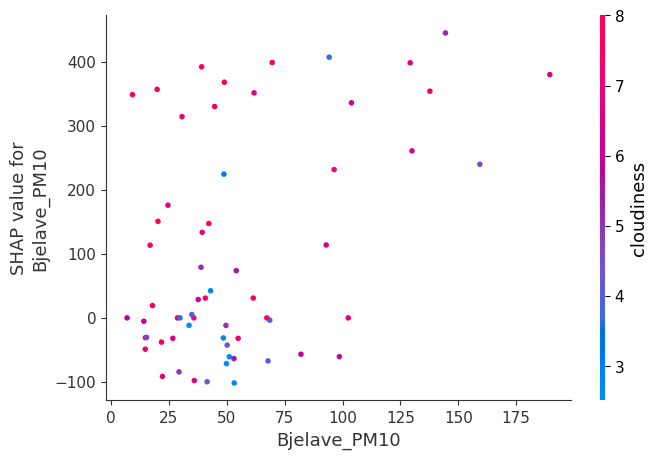

In [238]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=7
)

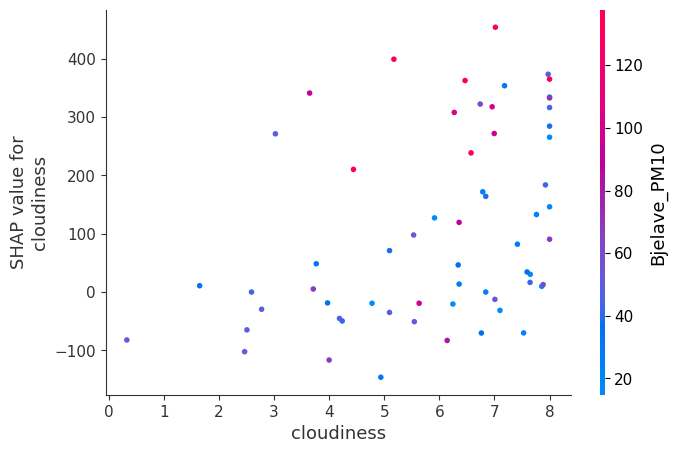

In [239]:
shap.dependence_plot(
    ind=7,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

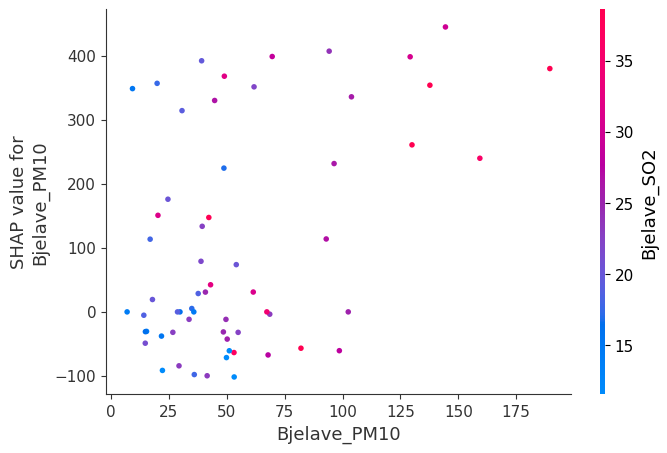

In [240]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=9
)

In [241]:
shap.dependence_plot(
    ind=9,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

In [242]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=10
)

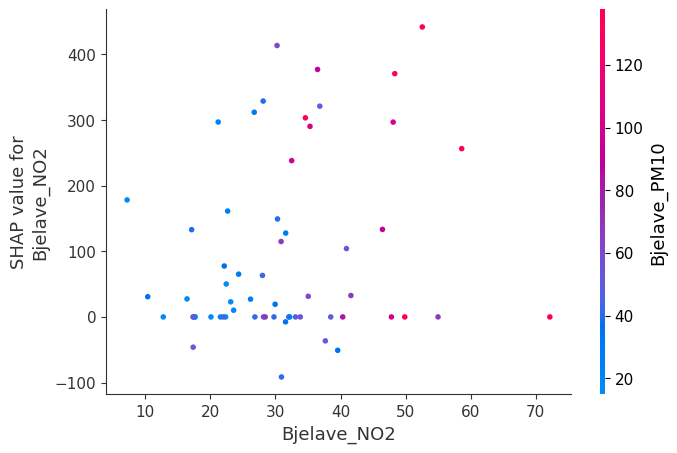

In [243]:
shap.dependence_plot(
    ind=10,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

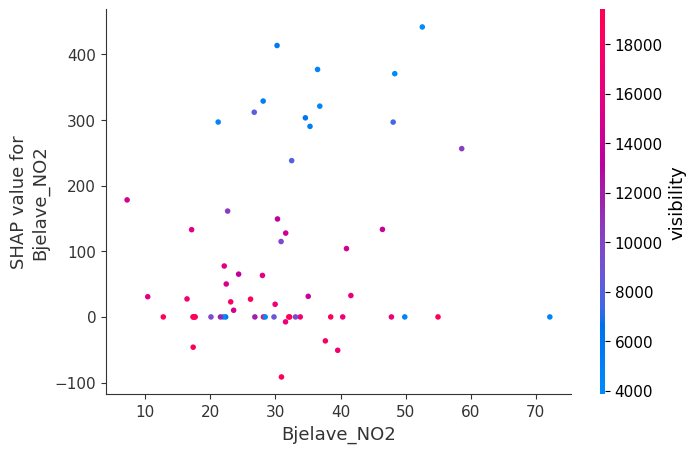

In [244]:
shap.dependence_plot(
    ind=10,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    #izostavljen indeks
)

# Dependence Plots for Window Size 30 (FB Prophet Model)

In [245]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=1
)

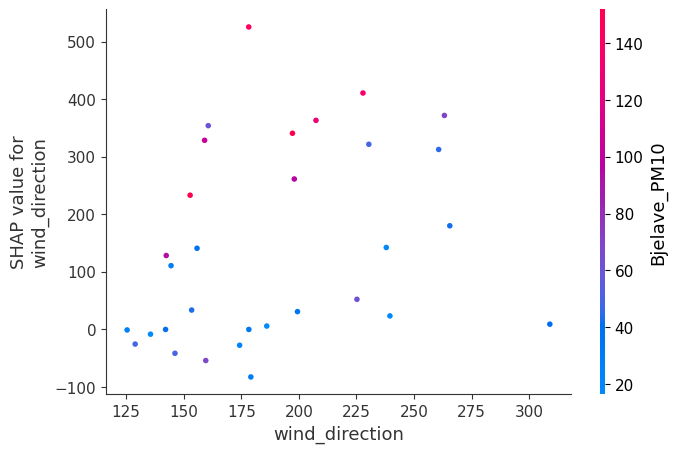

In [246]:
shap.dependence_plot(
    ind=1,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

In [247]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=2
)

In [248]:
shap.dependence_plot(
    ind=2,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

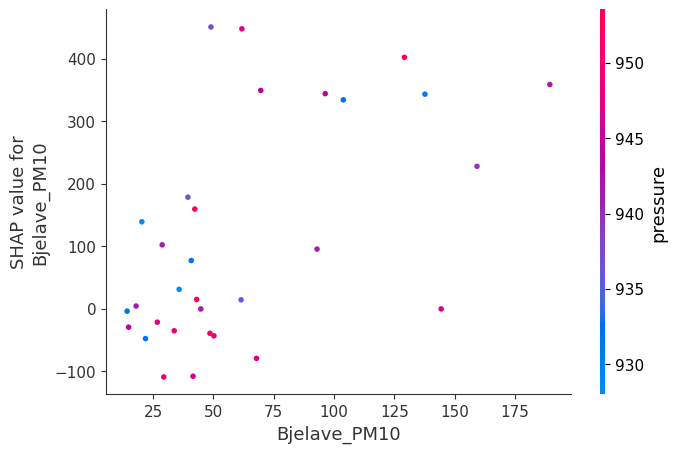

In [249]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=3
)

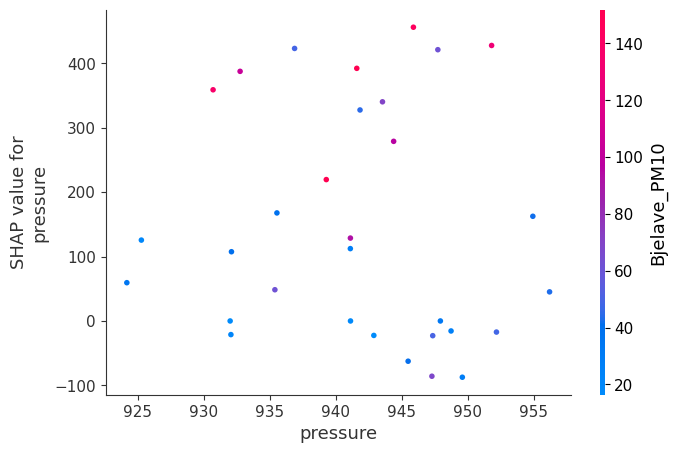

In [250]:
shap.dependence_plot(
    ind=3,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

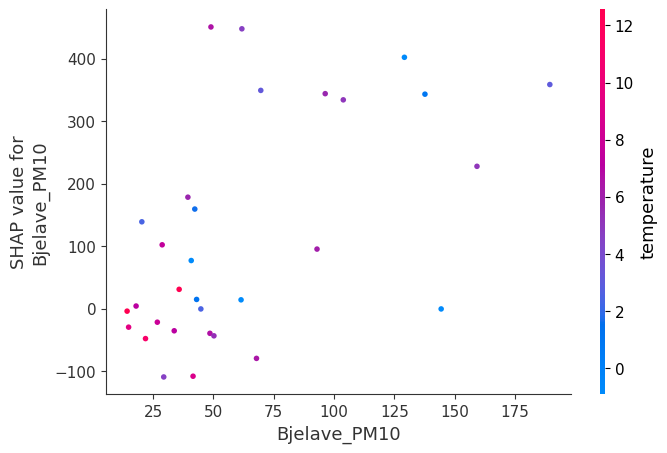

In [251]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=4
)

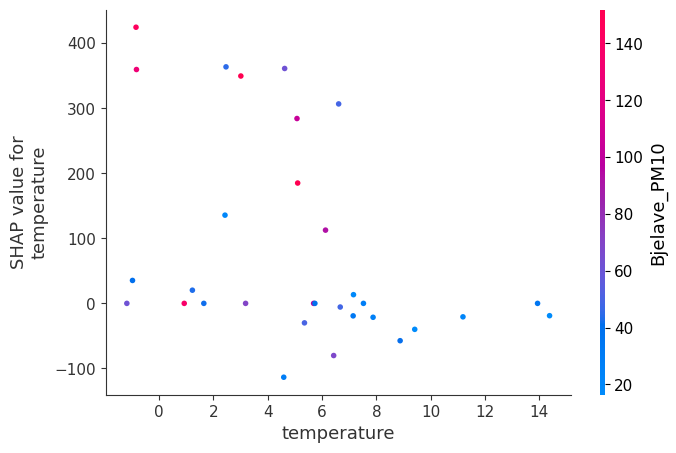

In [252]:
shap.dependence_plot(
    ind=4,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

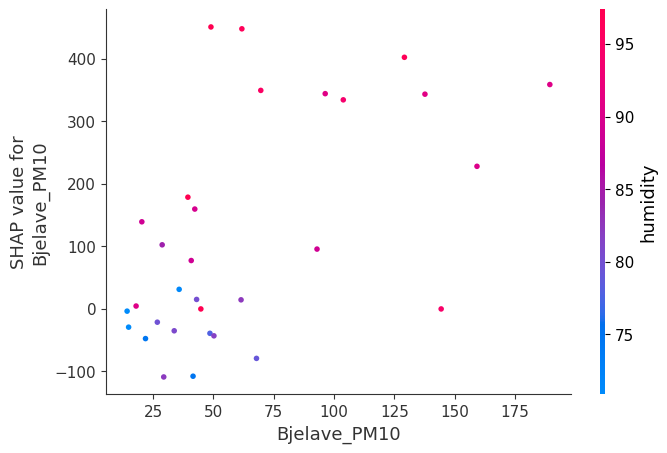

In [253]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=5
)

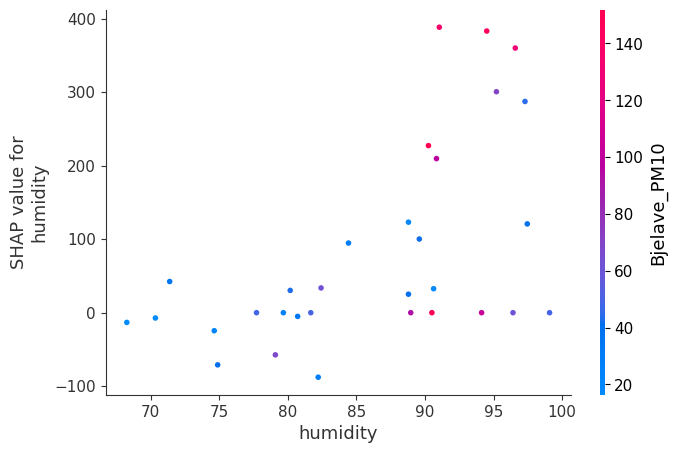

In [254]:
shap.dependence_plot(
    ind=5,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

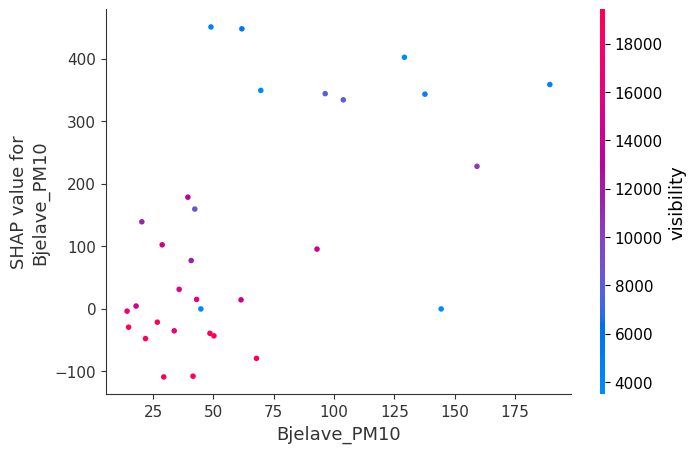

In [255]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=6
)

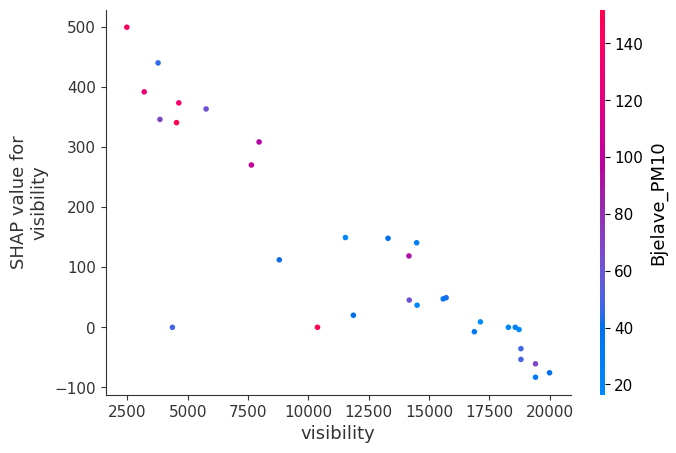

In [256]:
shap.dependence_plot(
    ind=6,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

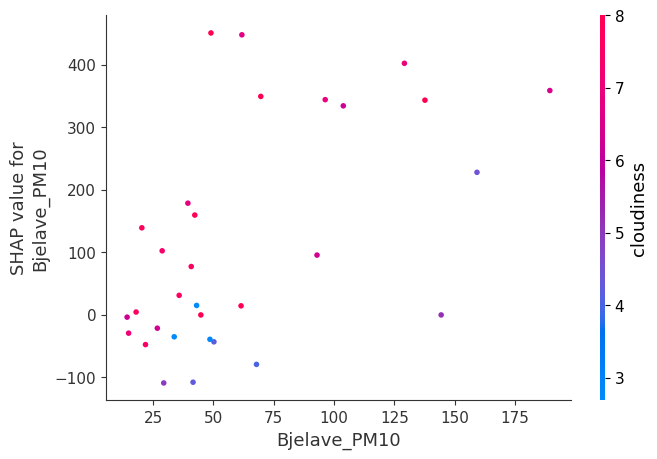

In [257]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=7
)

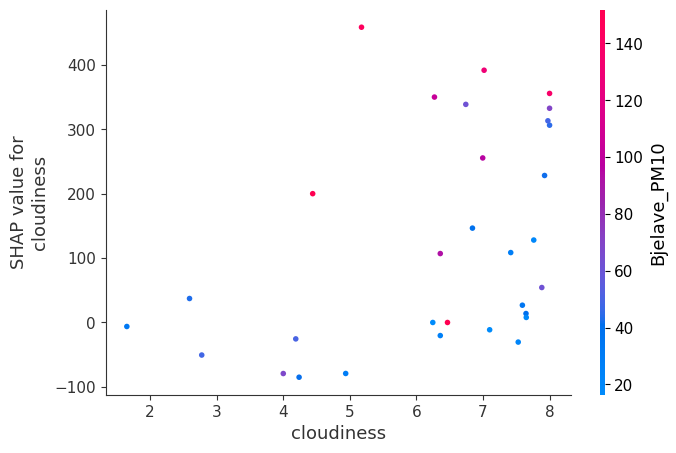

In [258]:
shap.dependence_plot(
    ind=7,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

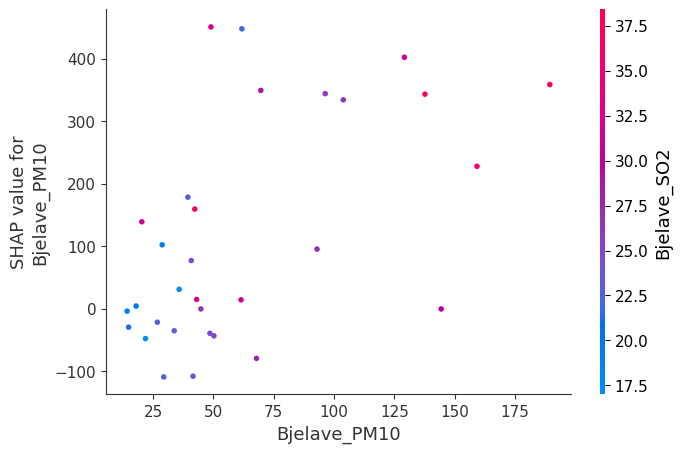

In [259]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=9
)

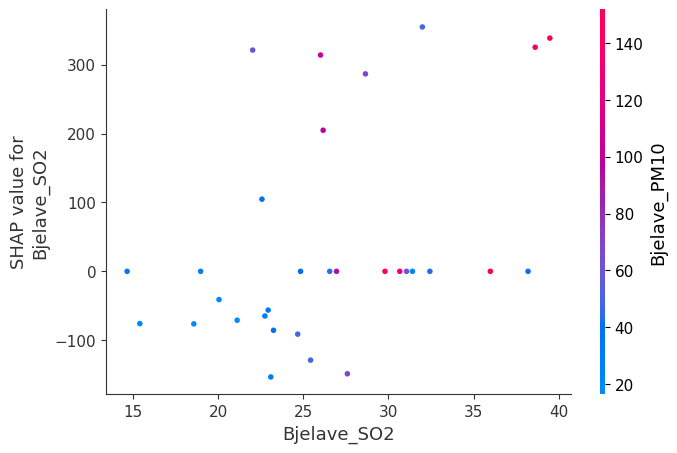

In [260]:
shap.dependence_plot(
    ind=9,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

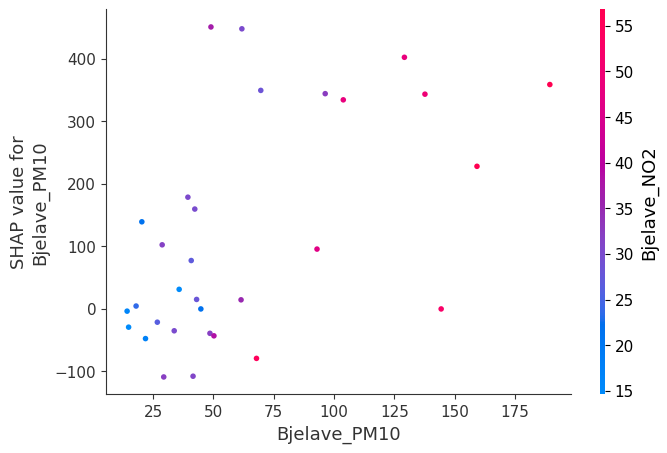

In [261]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=10
)

In [262]:
shap.dependence_plot(
    ind=10,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

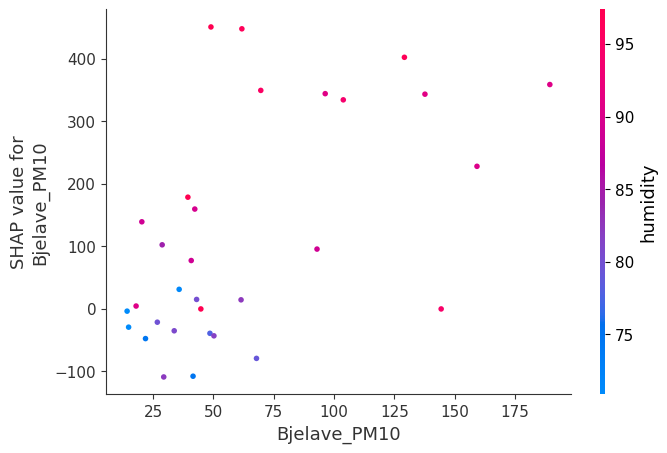

In [263]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed
    #izostavljen indeks
)

# Dependence Plots for Window Size 90 (FB Prophet Model) TBD